In [1]:
inp_seed=10

In [2]:
# load R library for files
library(MCMCpack)
library(coda)
library(xtable)
library(kknn)
library(tictoc)

# setup parameter values
ndim = 2; nmcmc = 5000

Loading required package: coda
Loading required package: MASS
##
## Markov Chain Monte Carlo Package (MCMCpack)
## Copyright (C) 2003-2020 Andrew D. Martin, Kevin M. Quinn, and Jong Hee Park
##
## Support provided by the U.S. National Science Foundation
## (Grants SES-0350646 and SES-0350613)
##


In [3]:
tic()
# load result files
impute = as.matrix(read.table("result/impute.txt"))
beta = as.matrix(read.table("result/beta.txt"))
theta = as.matrix(read.table("result/theta.txt"))
nsample = ncol(theta)
nitem = ncol(beta)
z = array(NA,dim=c(nmcmc,nsample,ndim))
w = array(NA,dim=c(nmcmc,nitem,ndim))
for(j in 1:ndim){
  fopen = paste("result/z",j,".txt",sep="")
  z[,,j] = as.matrix(read.table(fopen))
}
for(j in 1:ndim){
  fopen = paste("result/w",j,".txt",sep="")
  w[,,j] = as.matrix(read.table(fopen))
}
var_beta = scan("result/var_beta.txt")
var_theta = scan("result/var_theta.txt")
mle = scan("result/mle.txt")
toc()

60.23 sec elapsed


In [4]:
tic()
# preparation of Procrustes matching
max.address = which.max(mle)
w.star = w[max.address,,]
z.star = z[max.address,,]
w.proc = array(0,dim=c(nmcmc,nitem,ndim))
z.proc = array(0,dim=c(nmcmc,nsample,ndim))

# Procrustes matching for latent spaces Z (respondent) and W (item)
for(iter in 1:nmcmc){
  z.iter = z[iter,,]
  w.iter = w[iter,,]
  if(iter != max.address){
    w.proc[iter,,] = procrustes(w.iter,w.star)$X.new
    z.proc[iter,,] = procrustes(z.iter,z.star)$X.new
  }
  else{
    w.proc[iter,,] = w.iter
    z.proc[iter,,] = z.iter
  }
}
toc()

22.5 sec elapsed


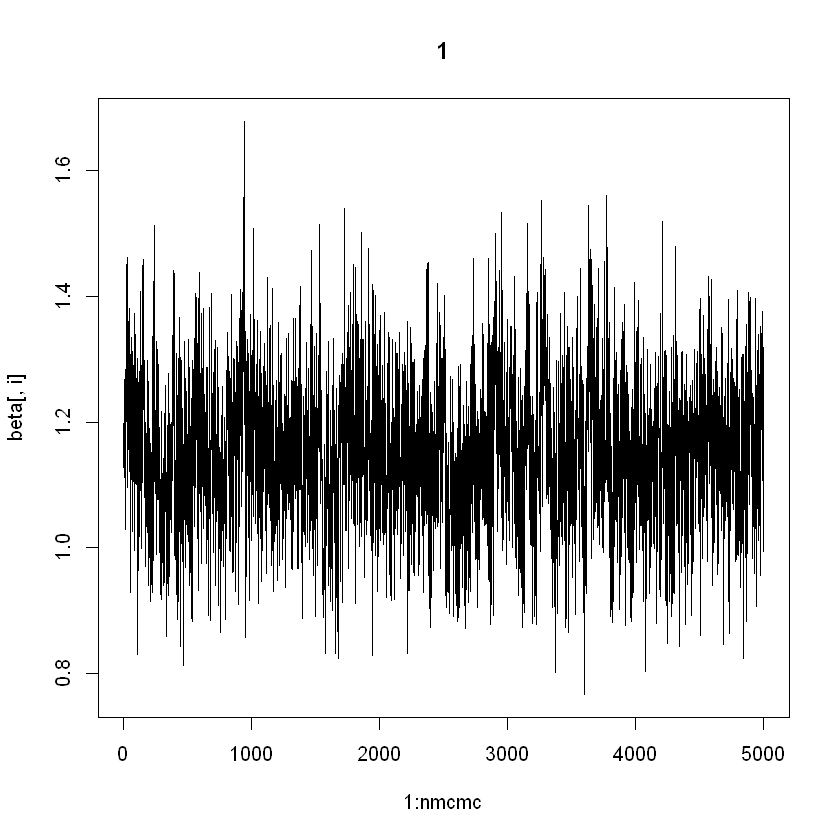

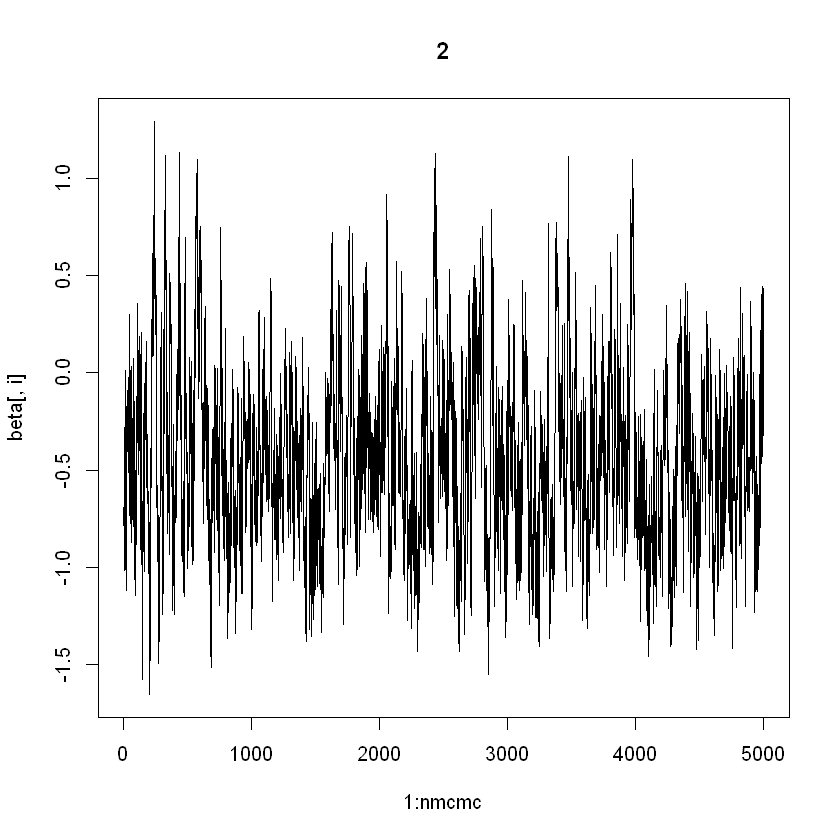

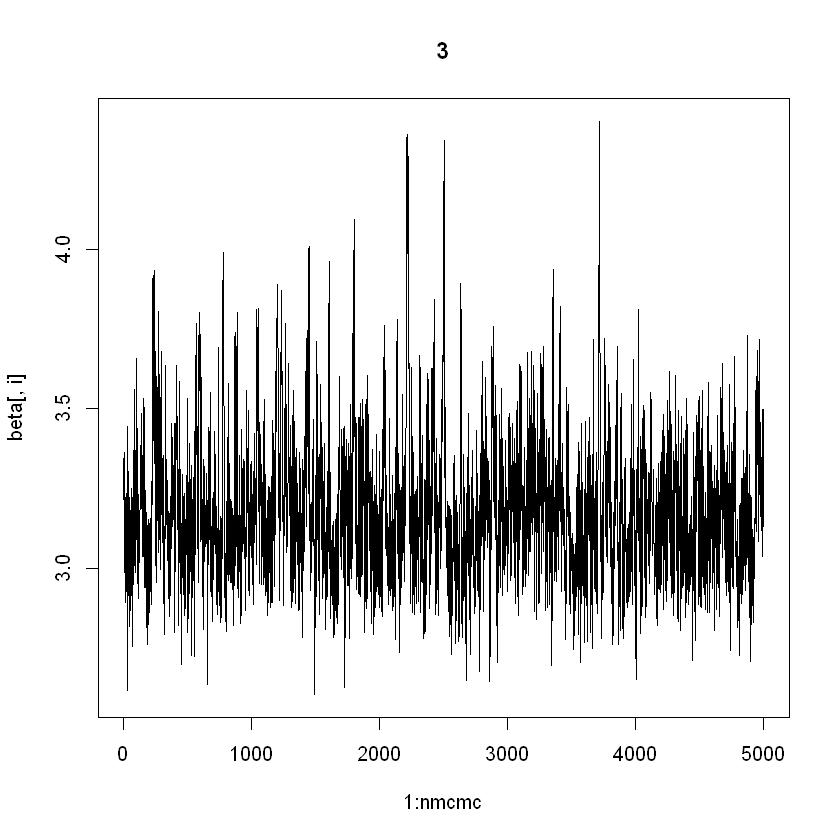

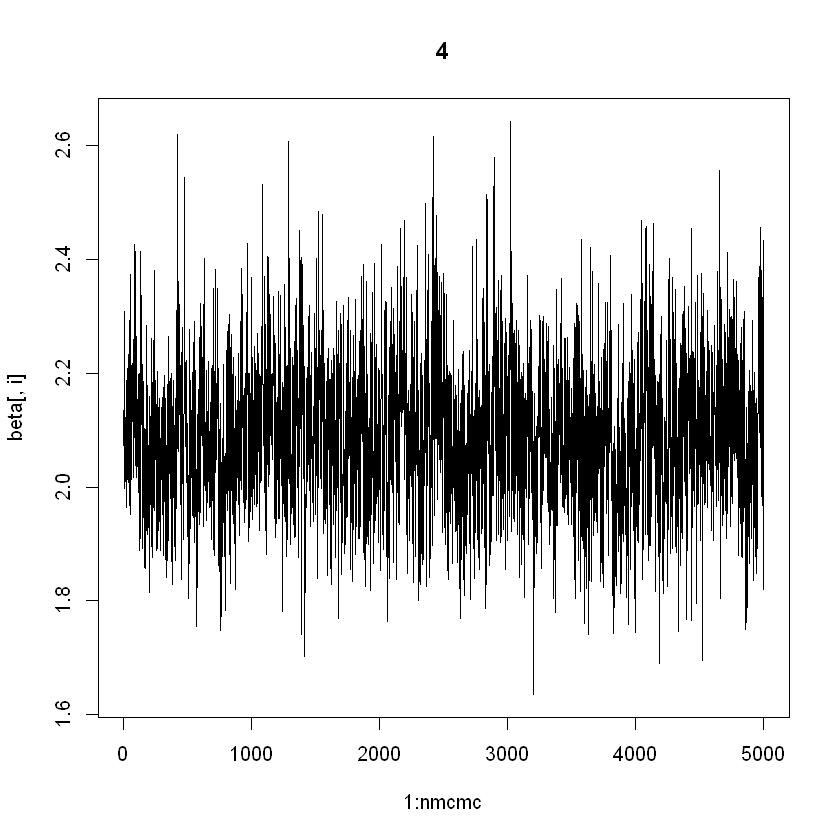

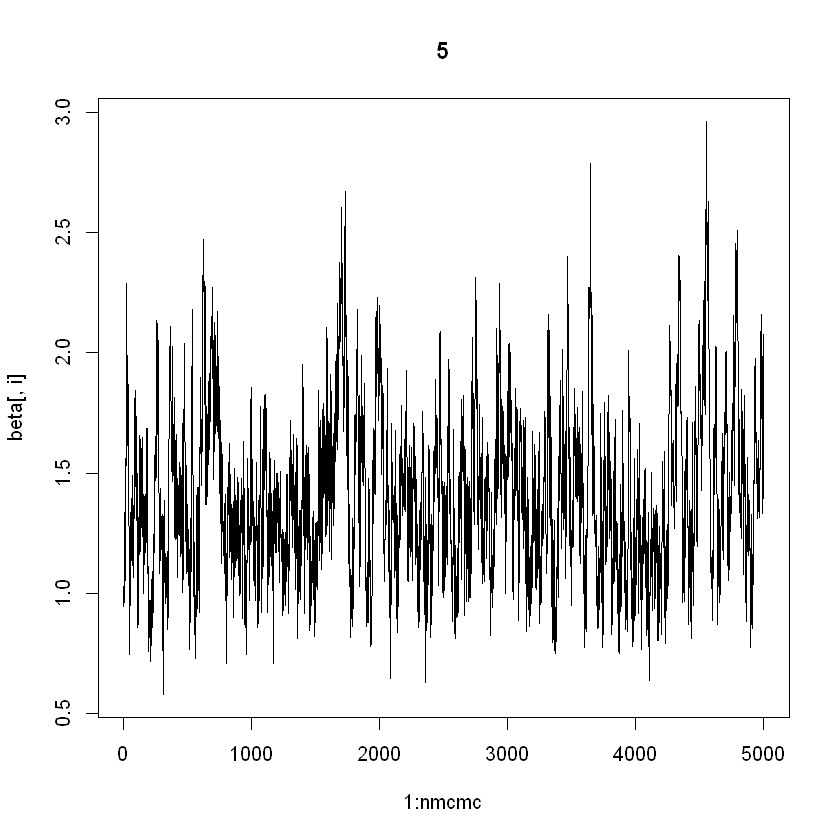

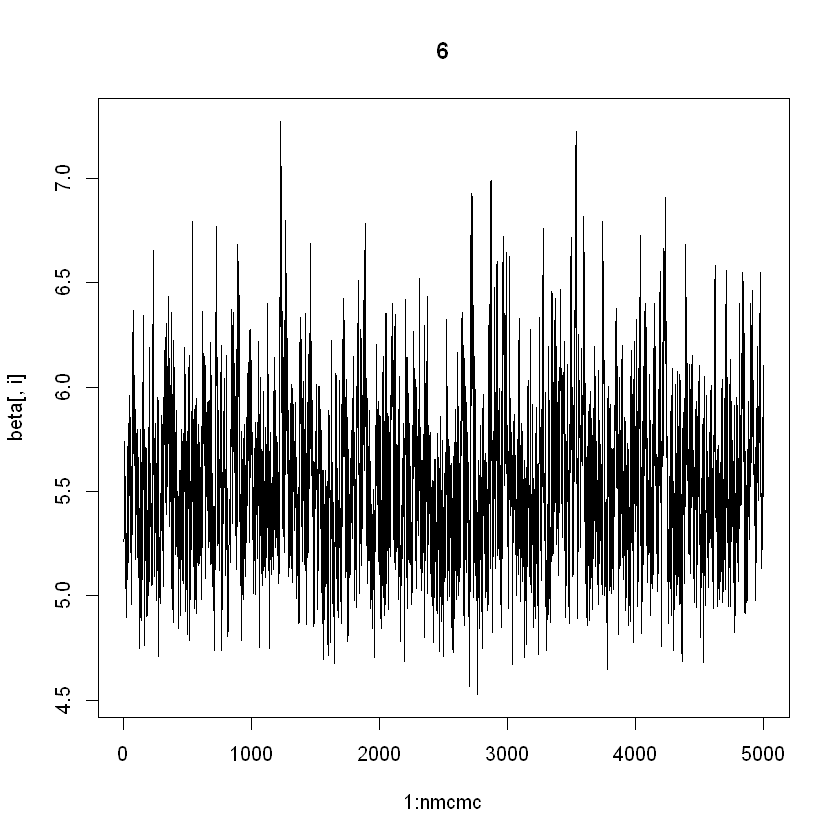

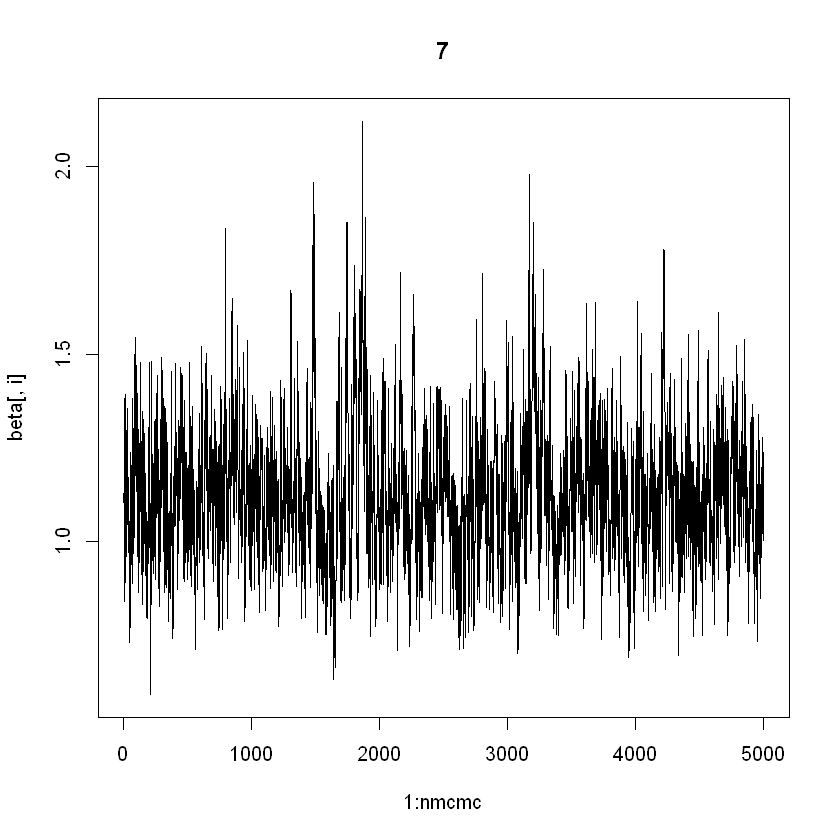

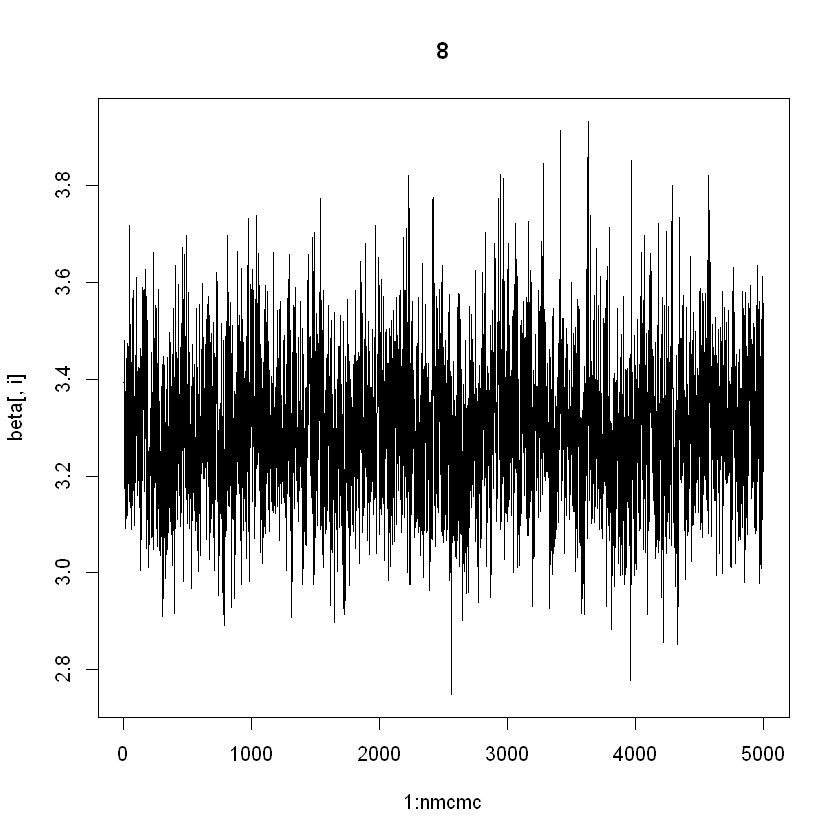

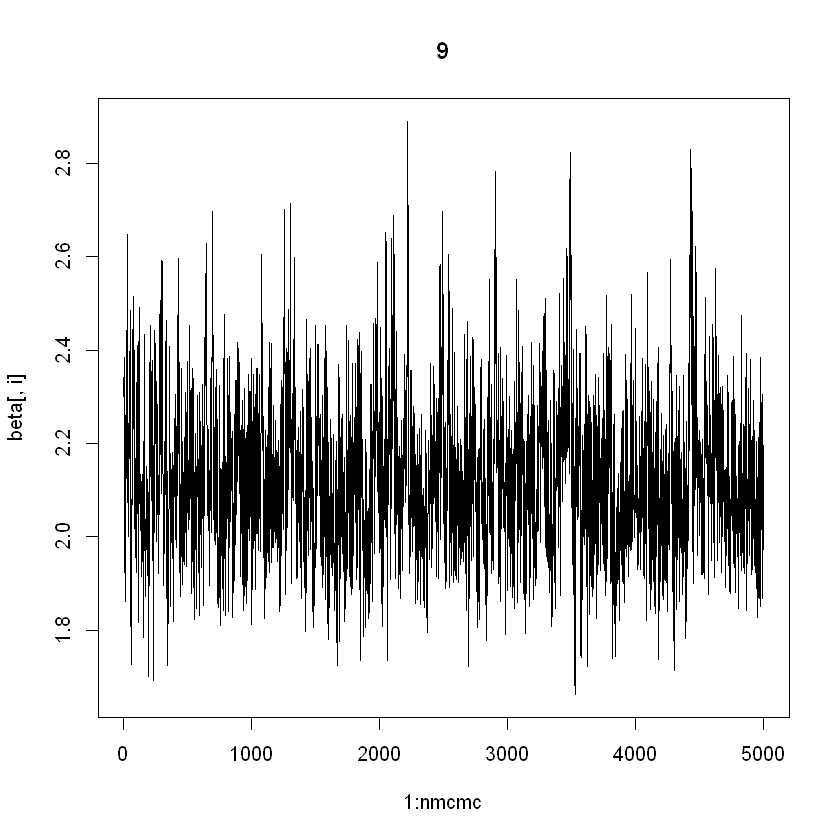

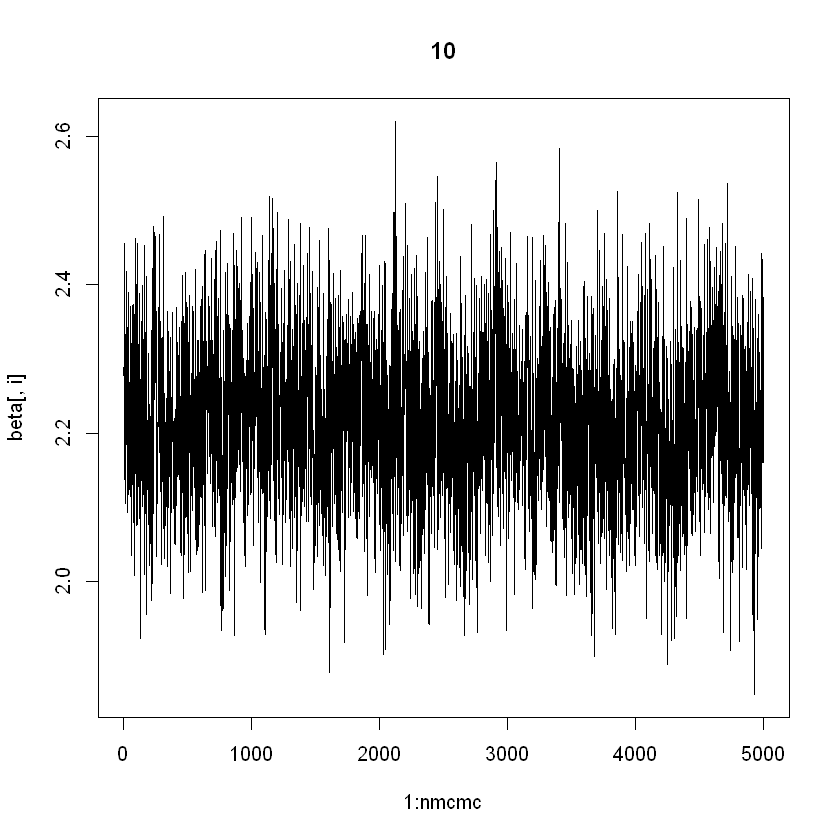

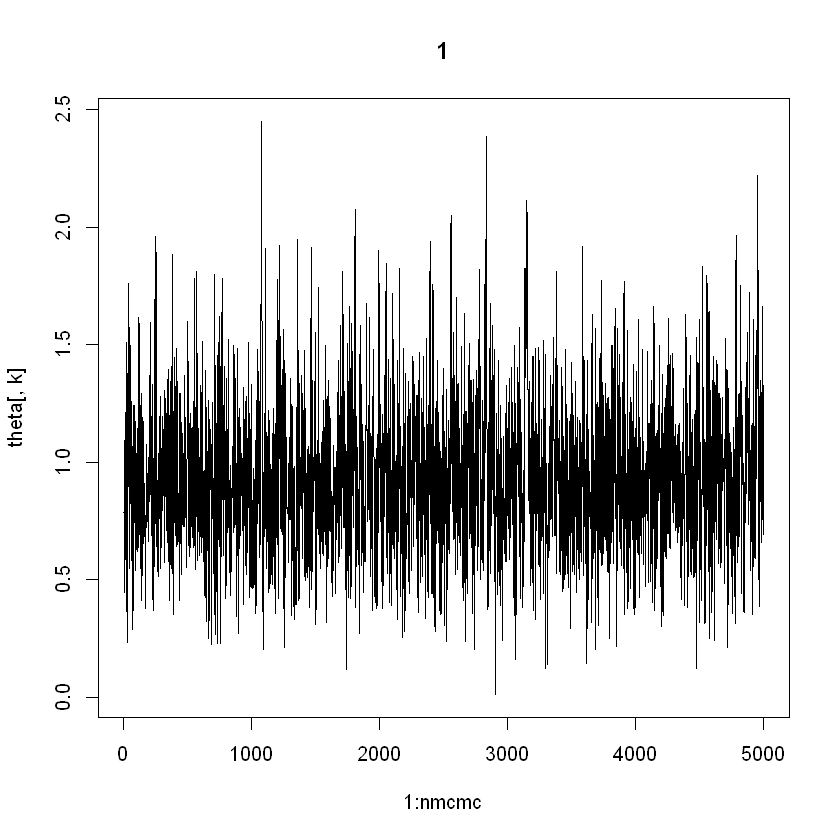

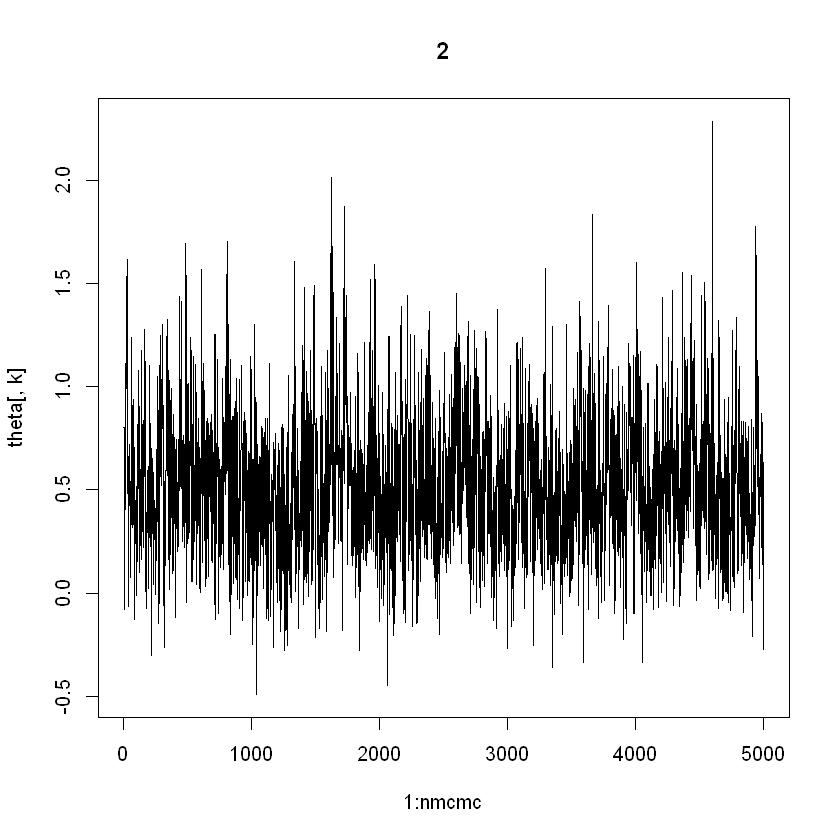

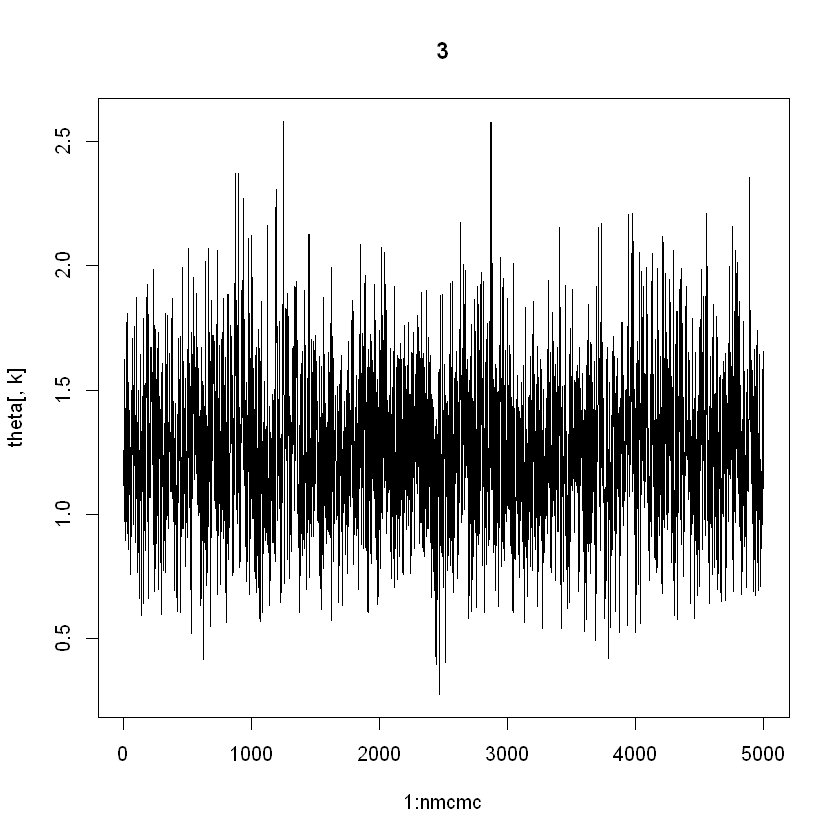

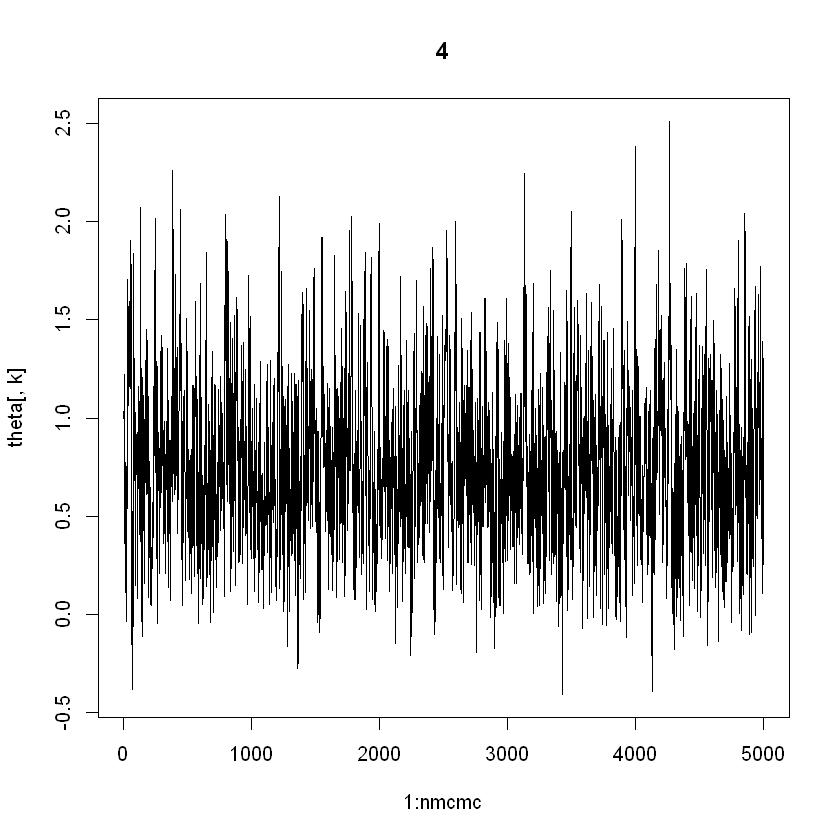

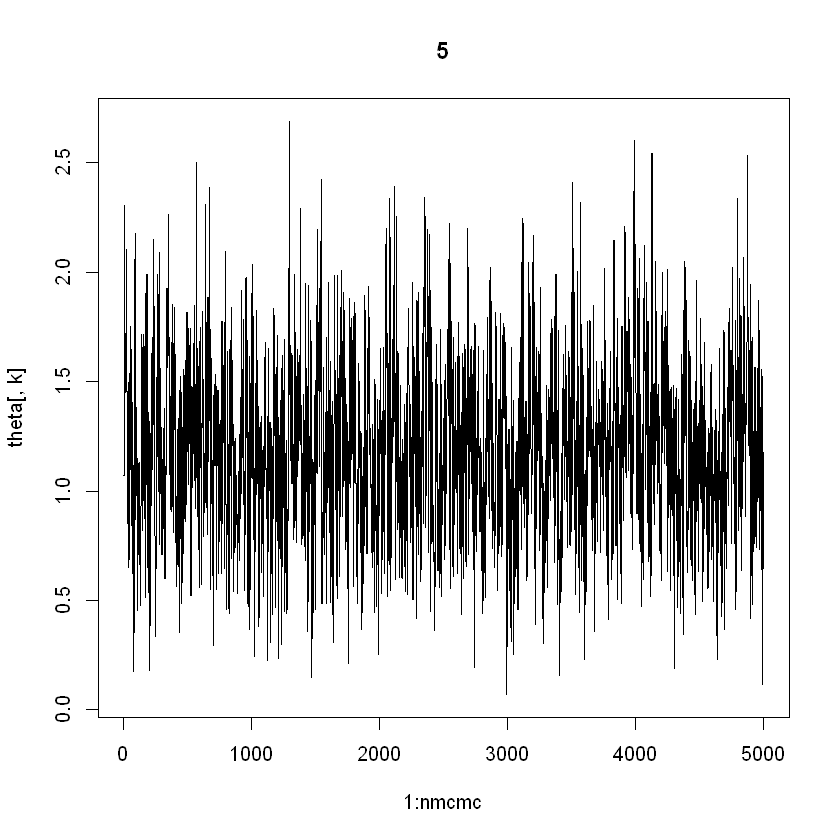

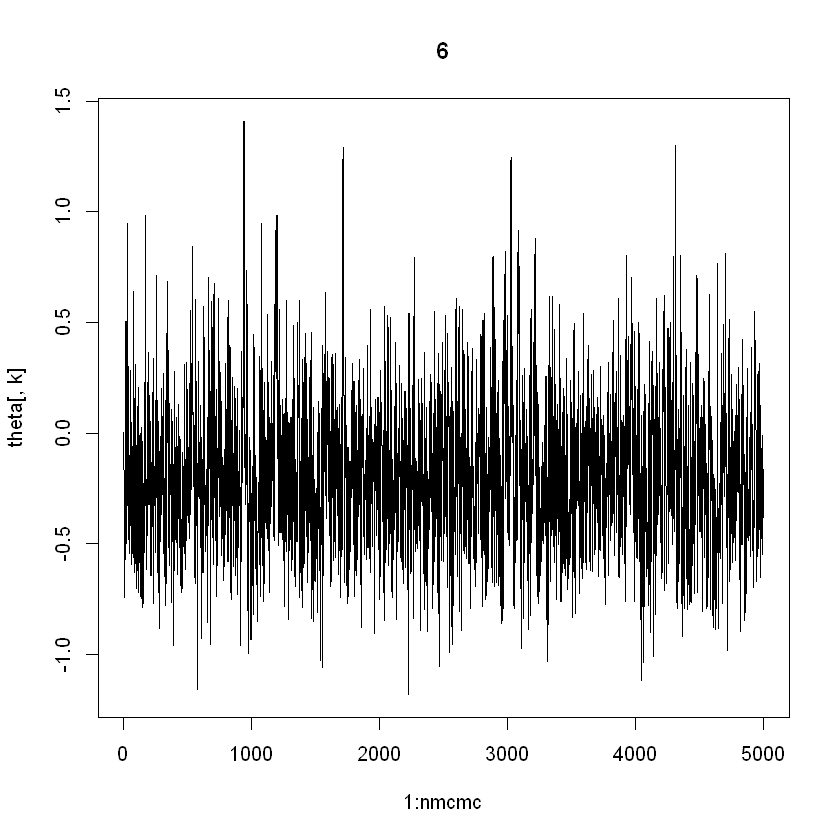

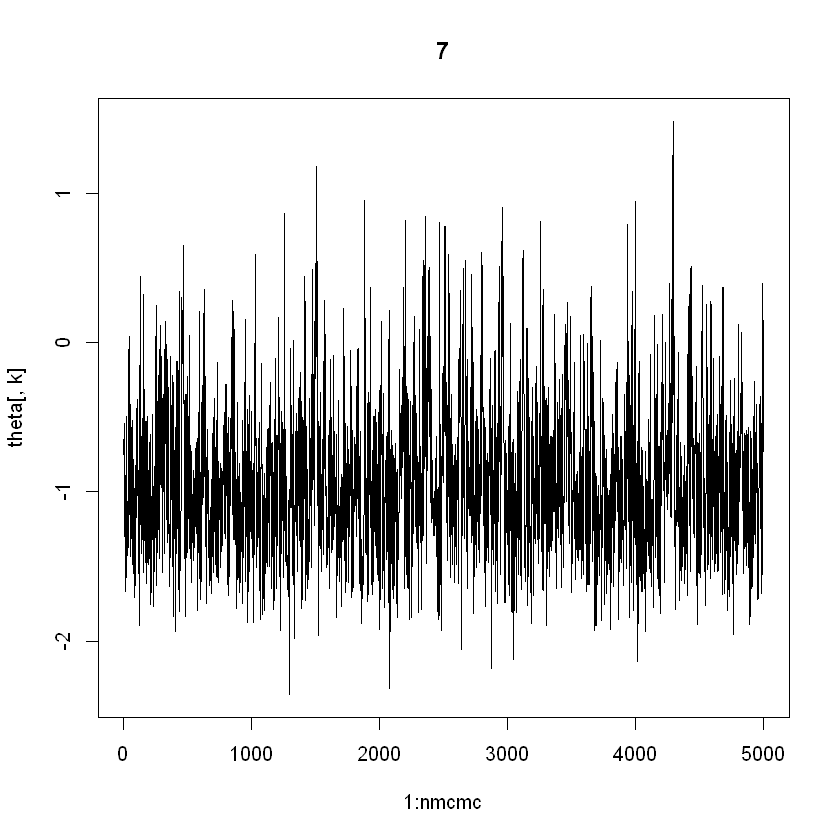

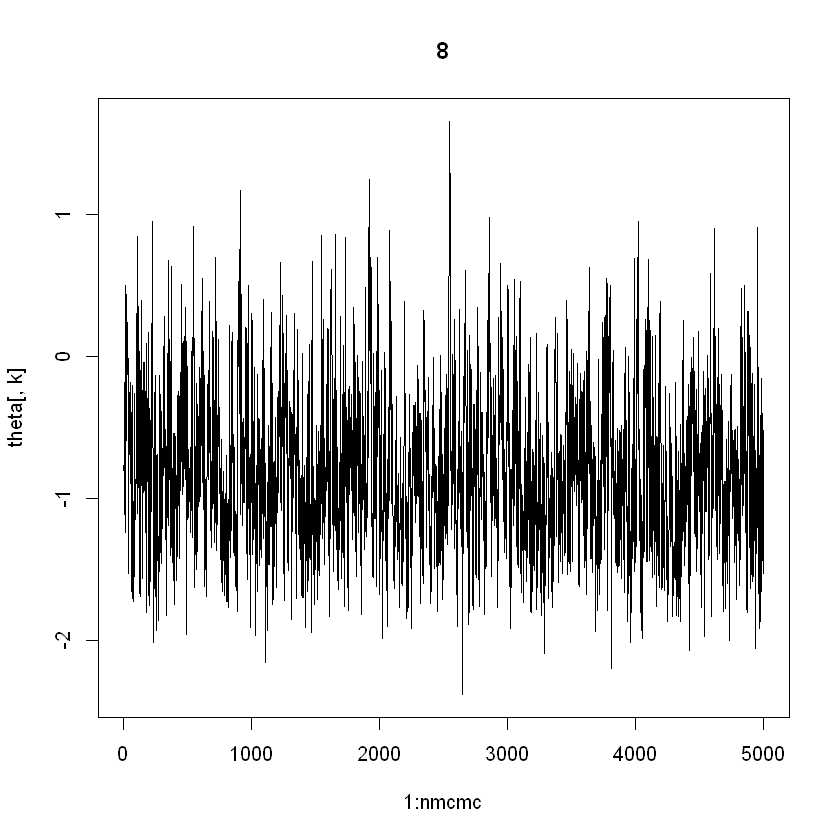

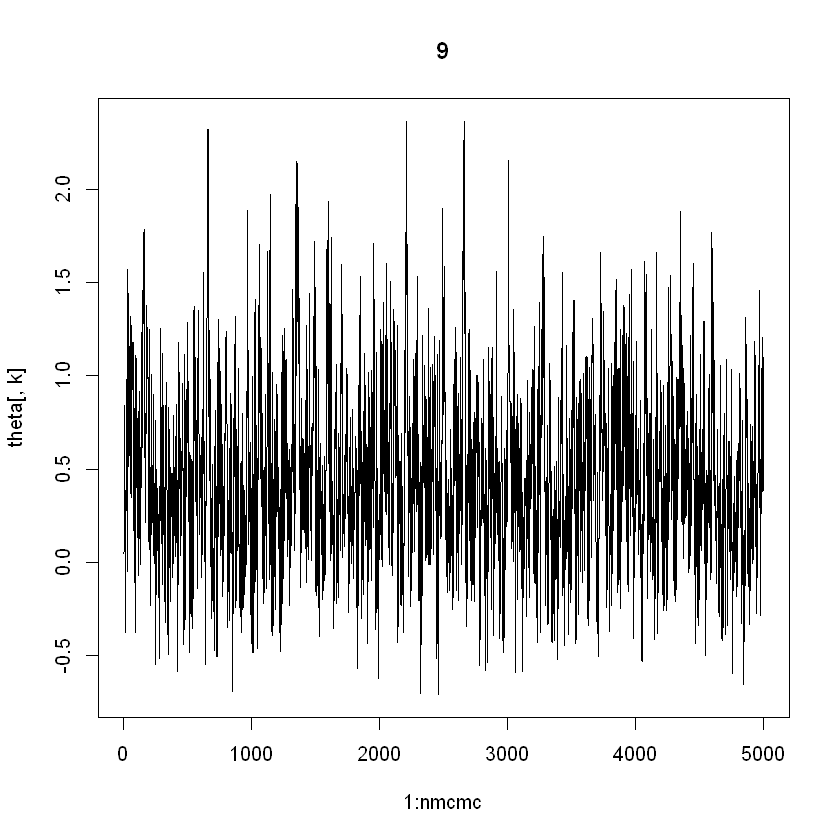

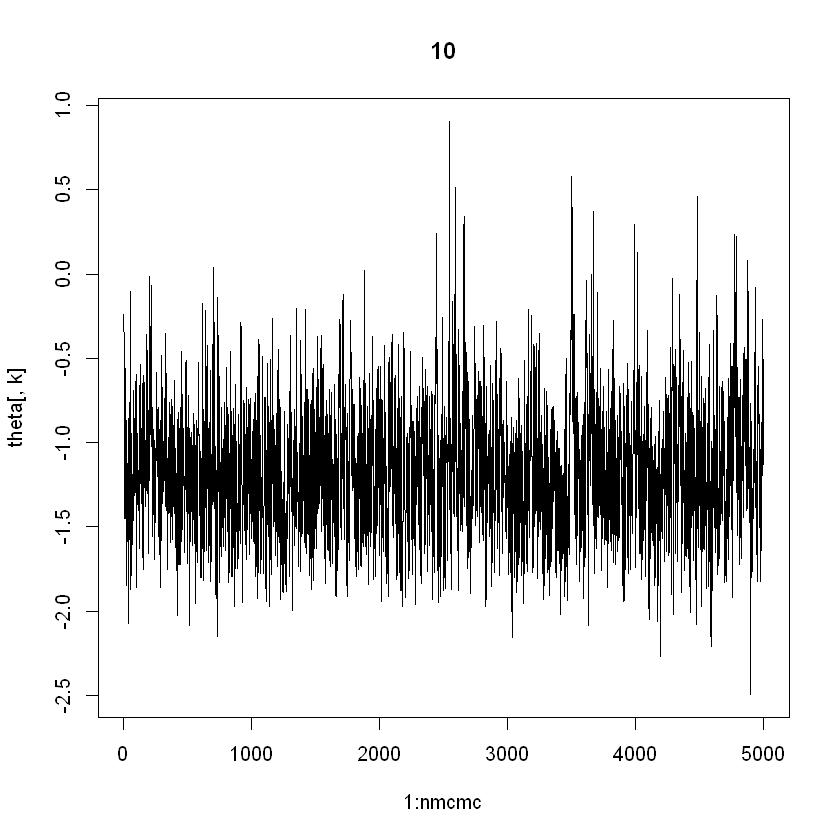

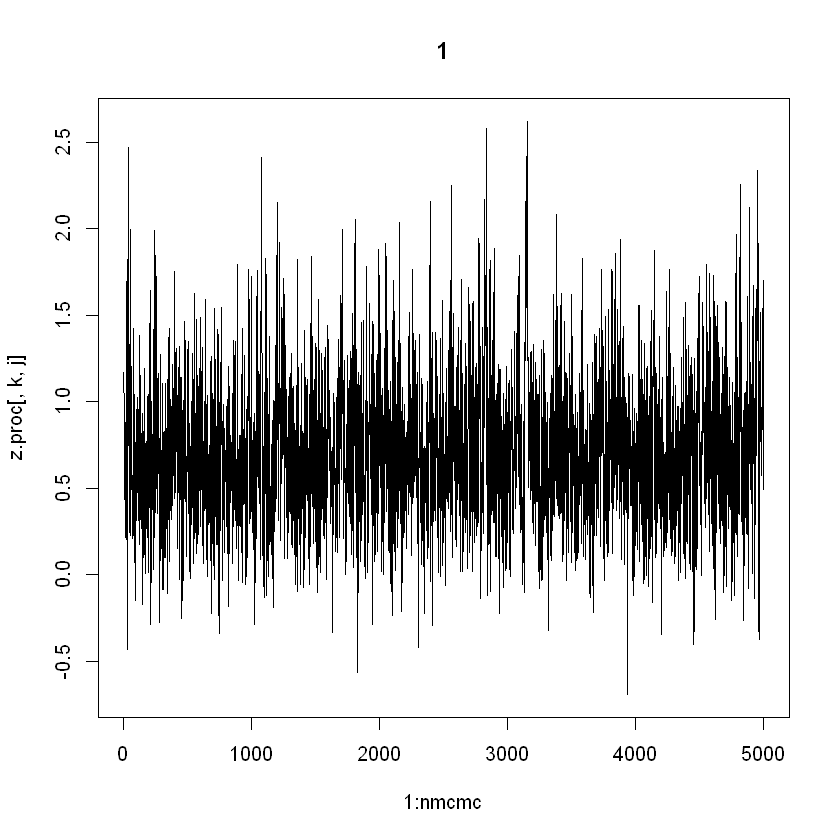

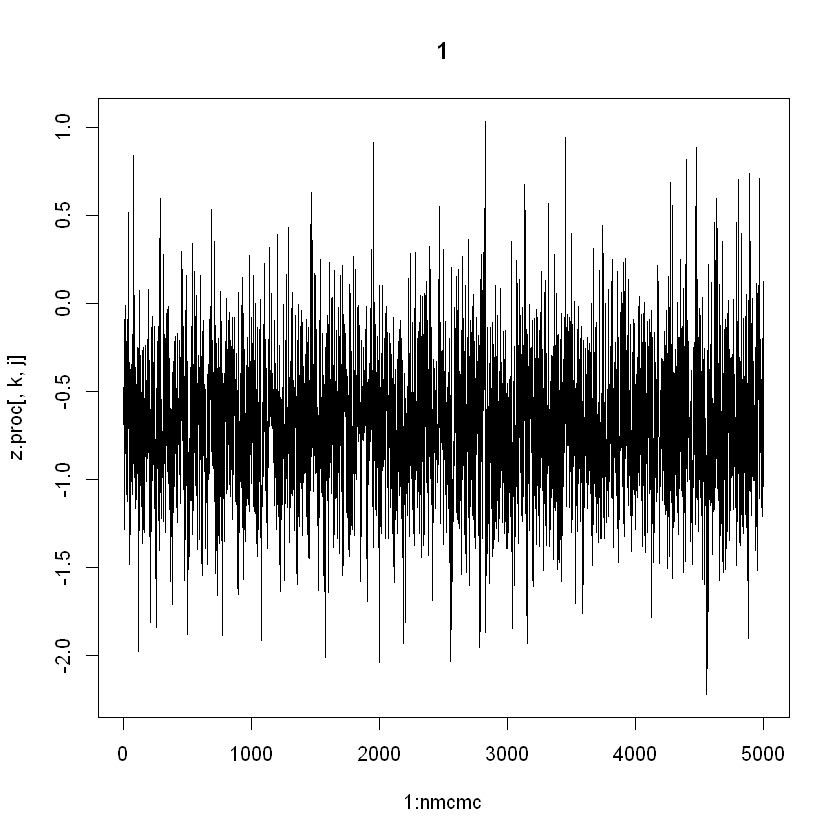

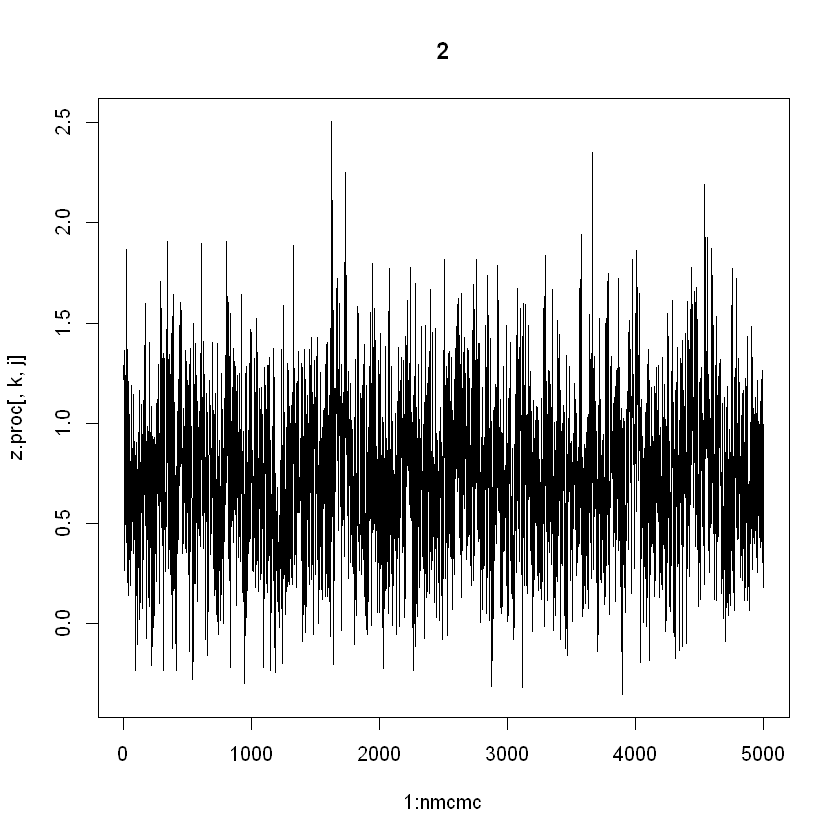

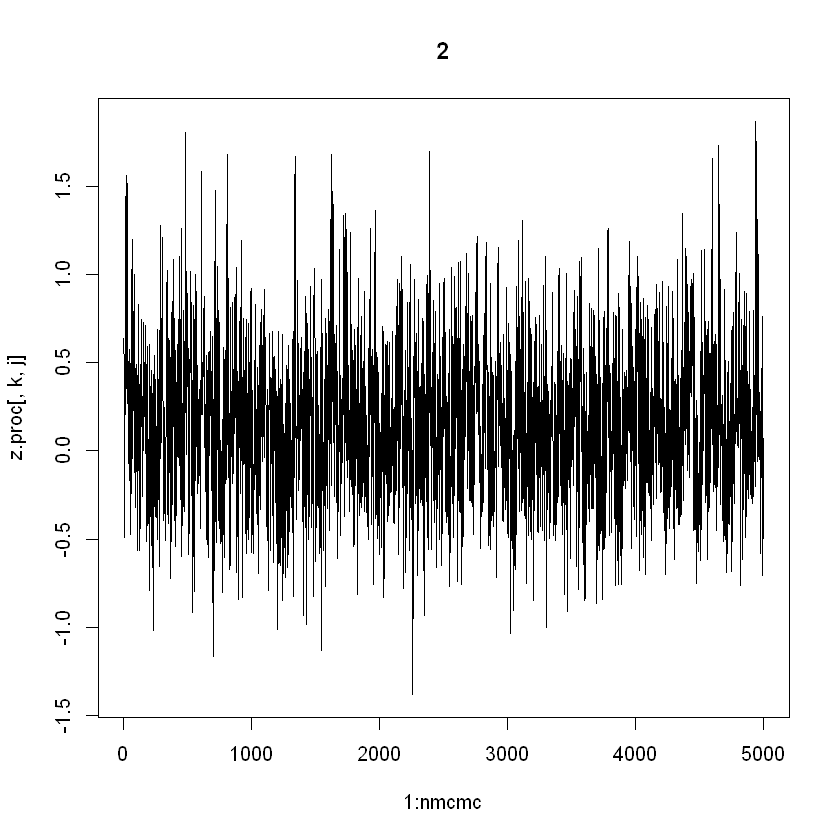

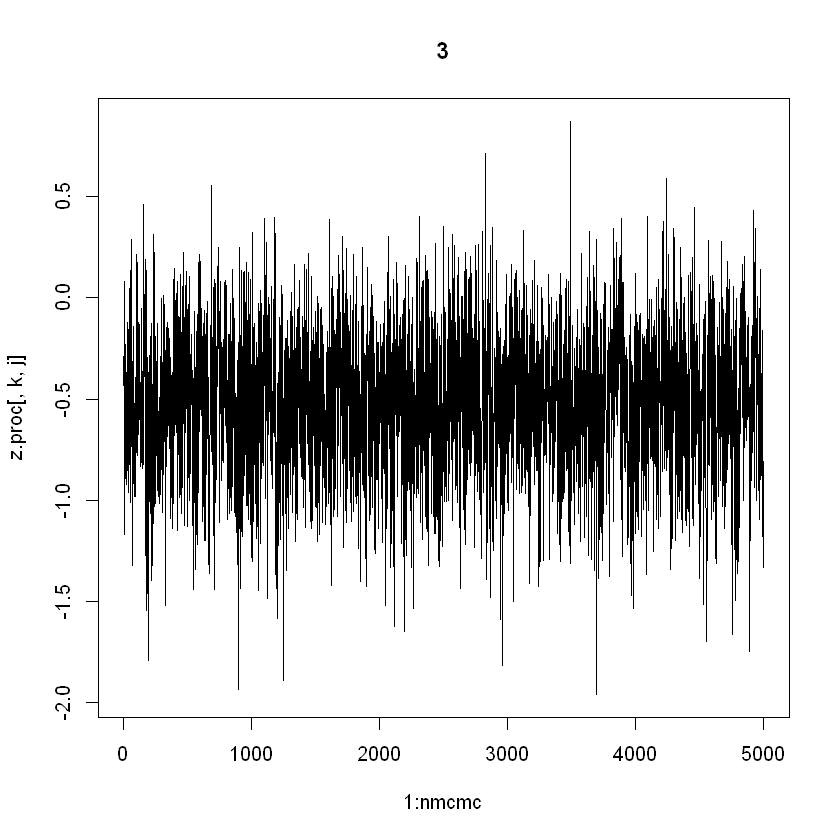

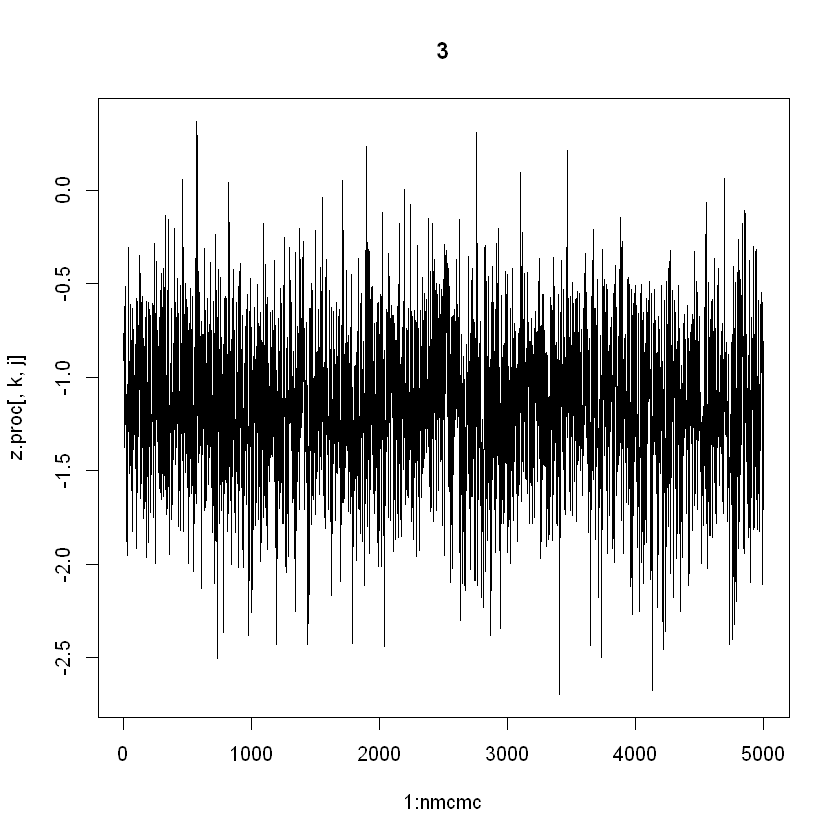

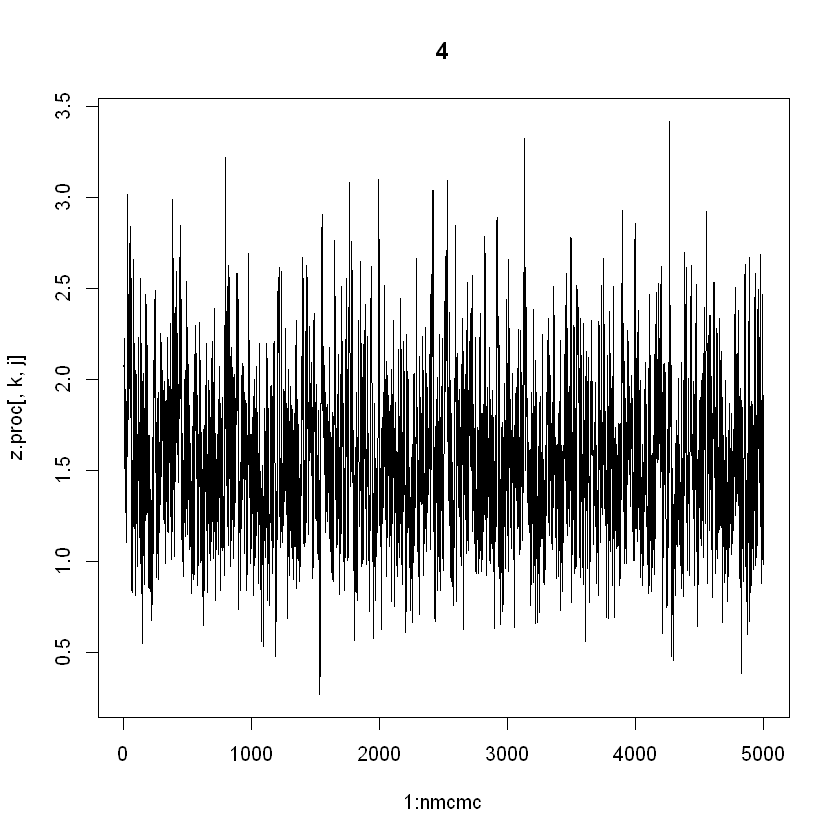

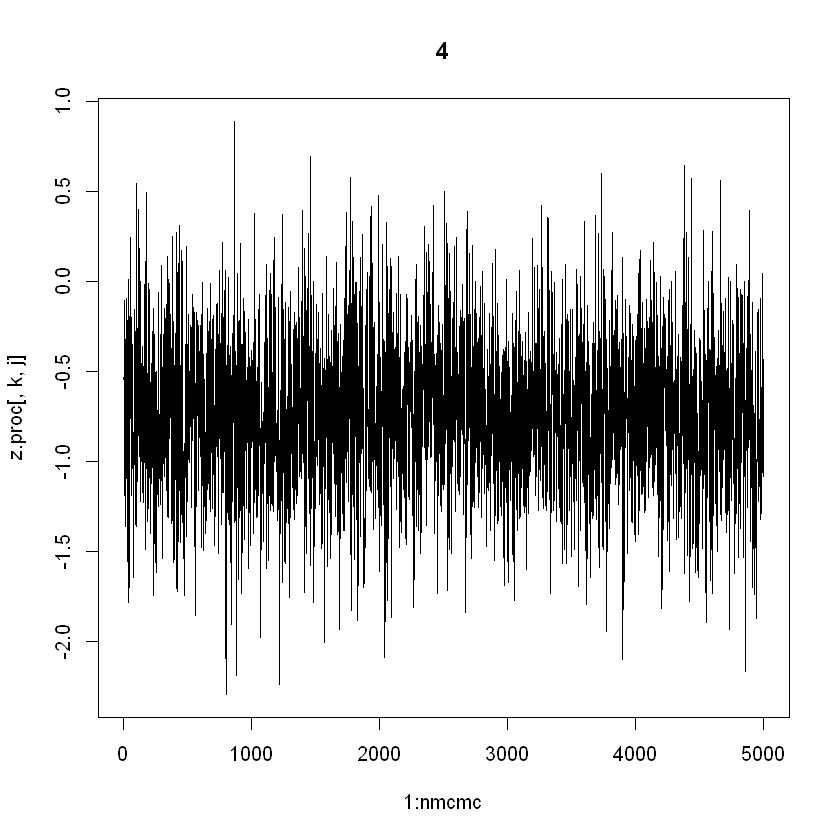

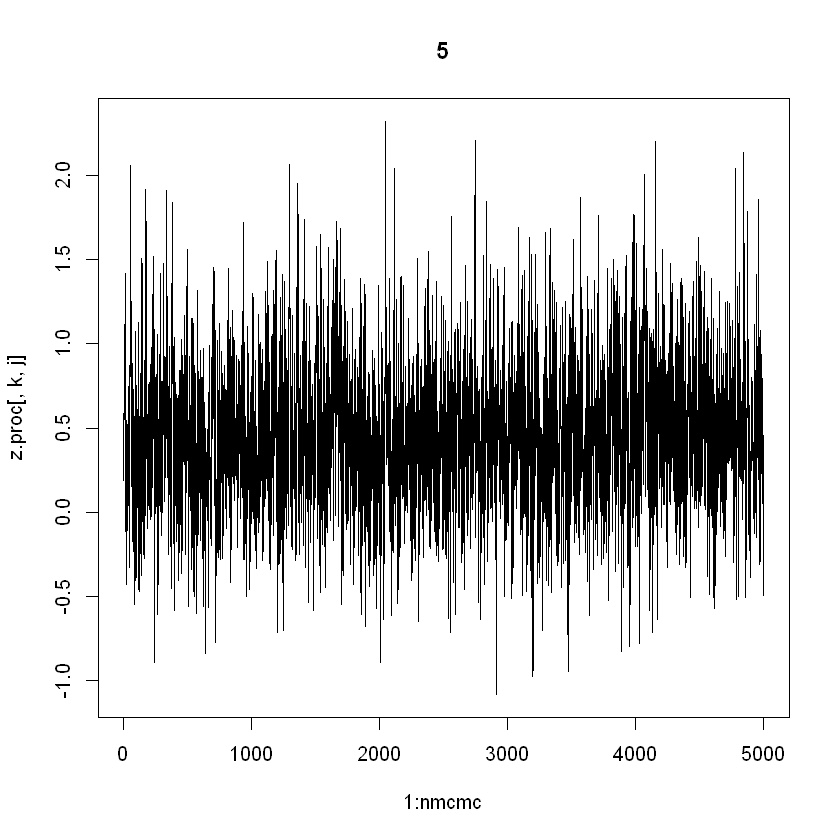

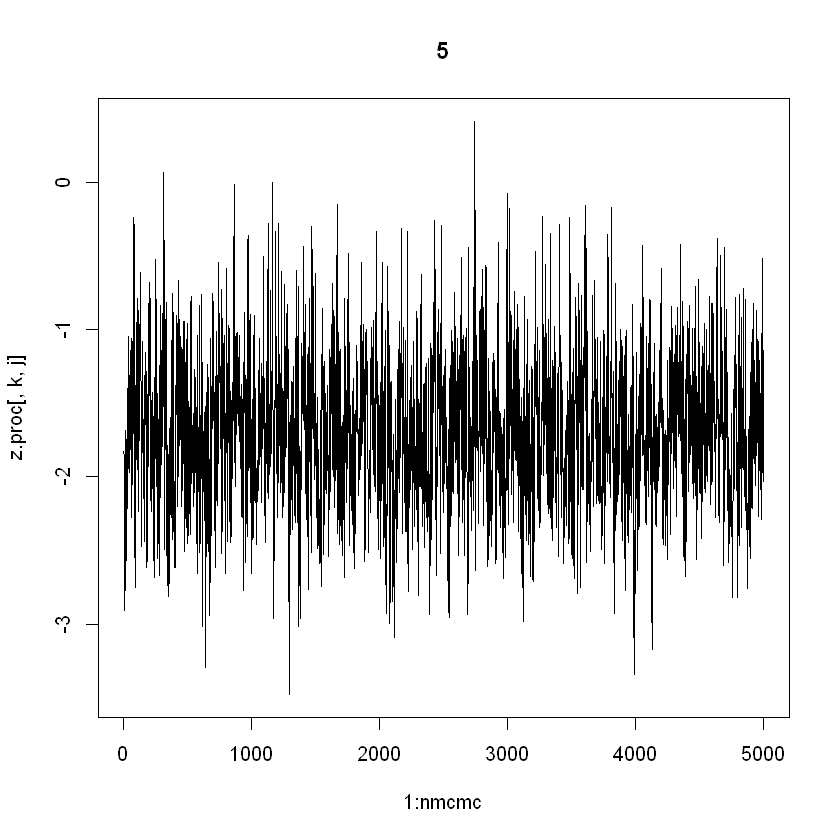

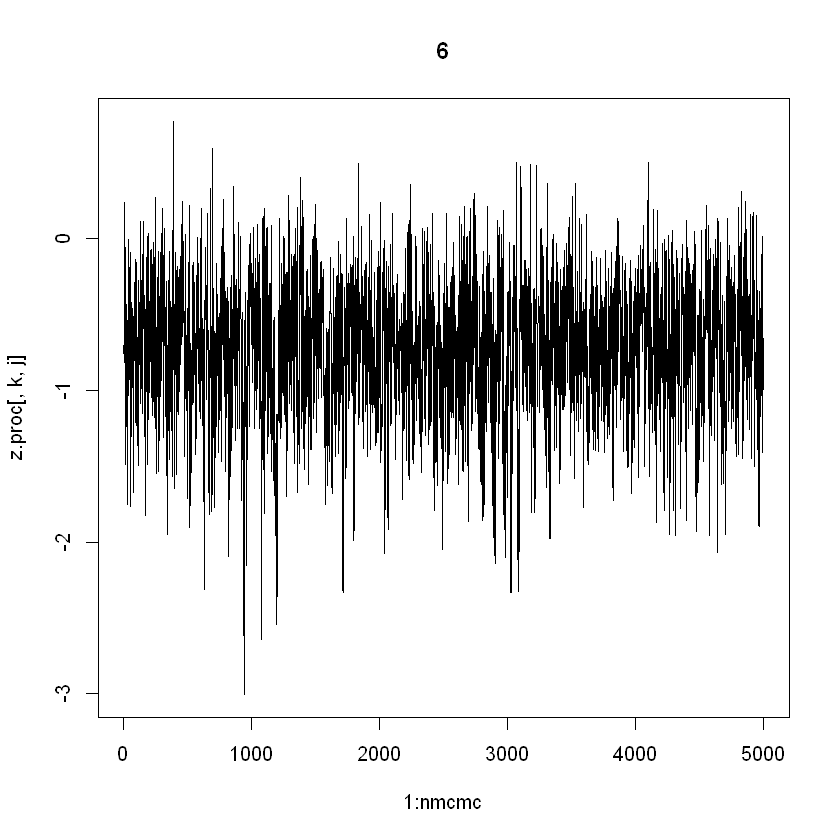

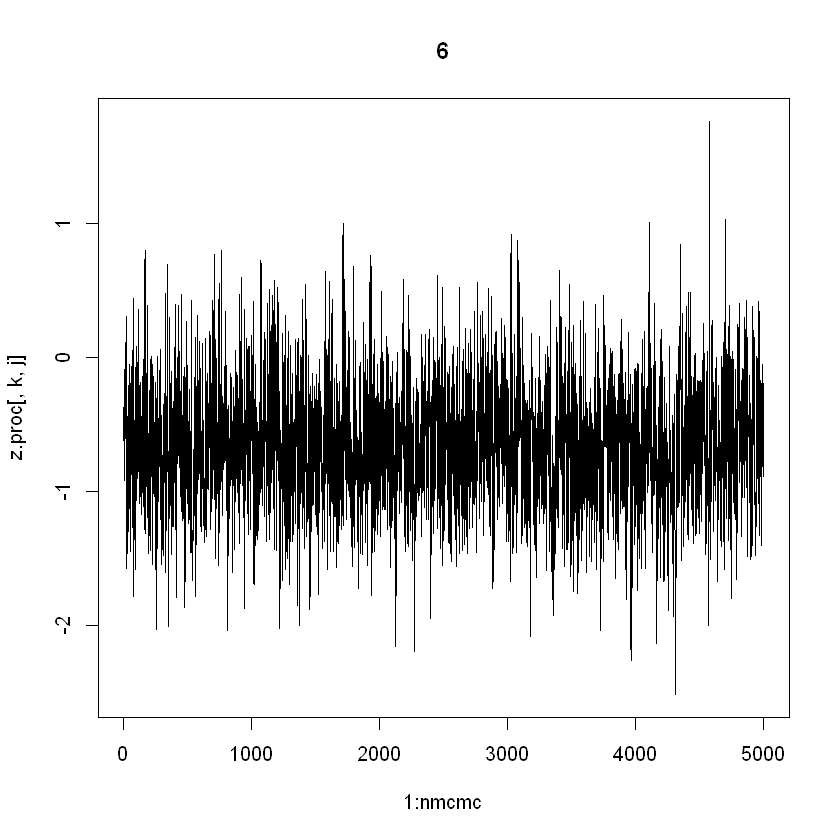

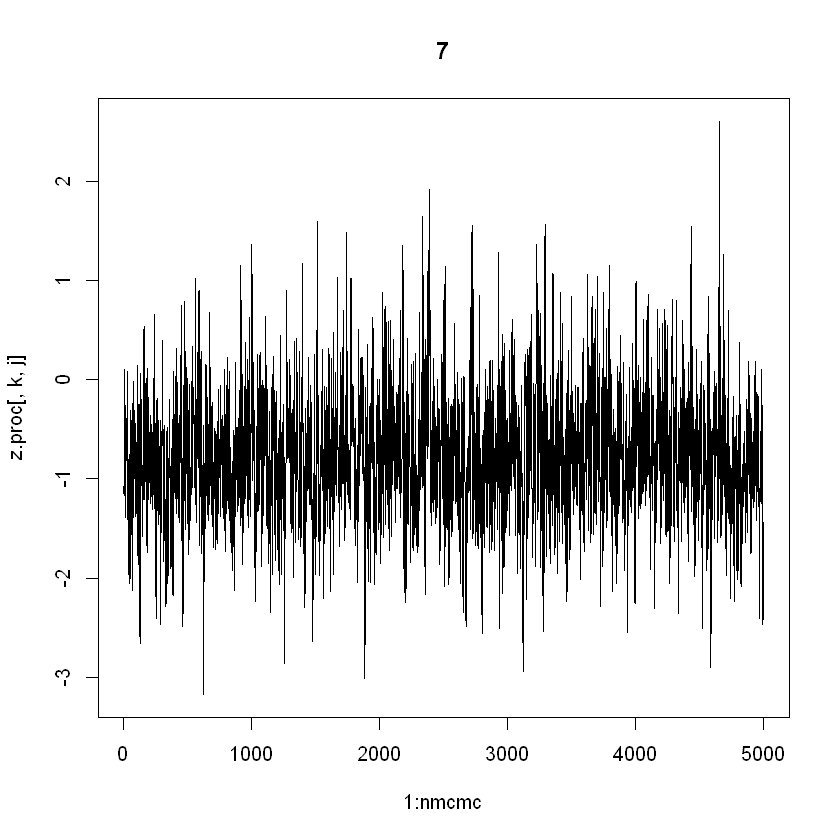

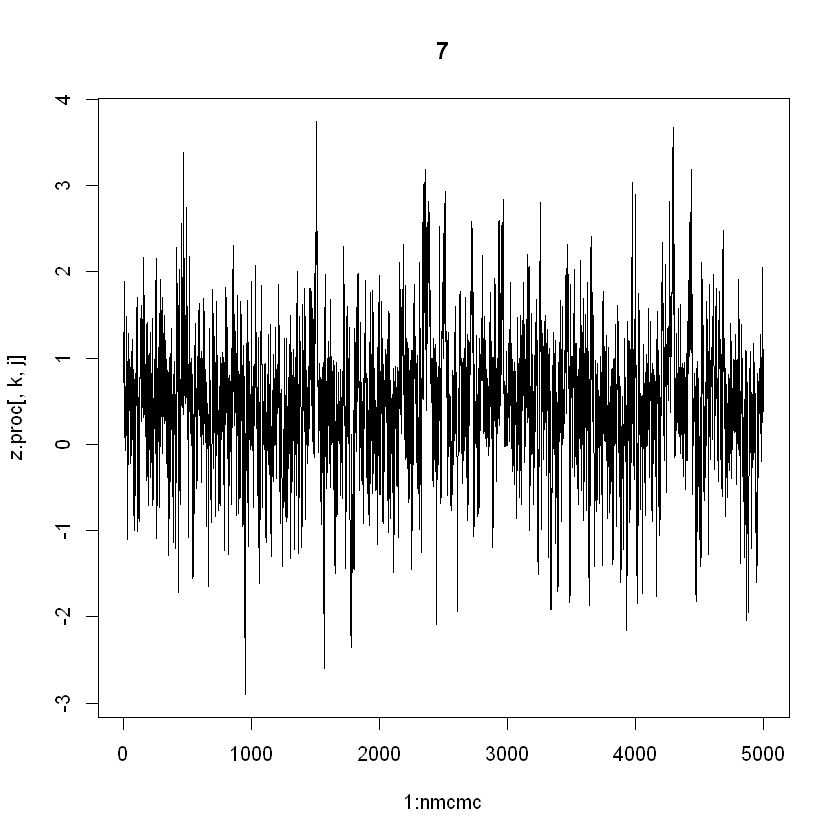

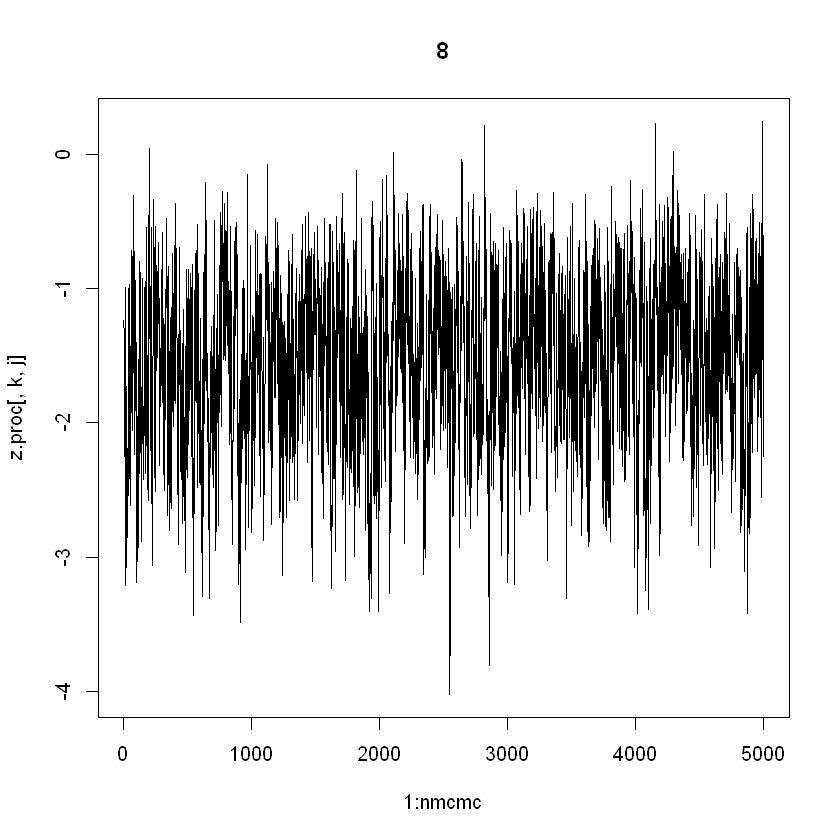

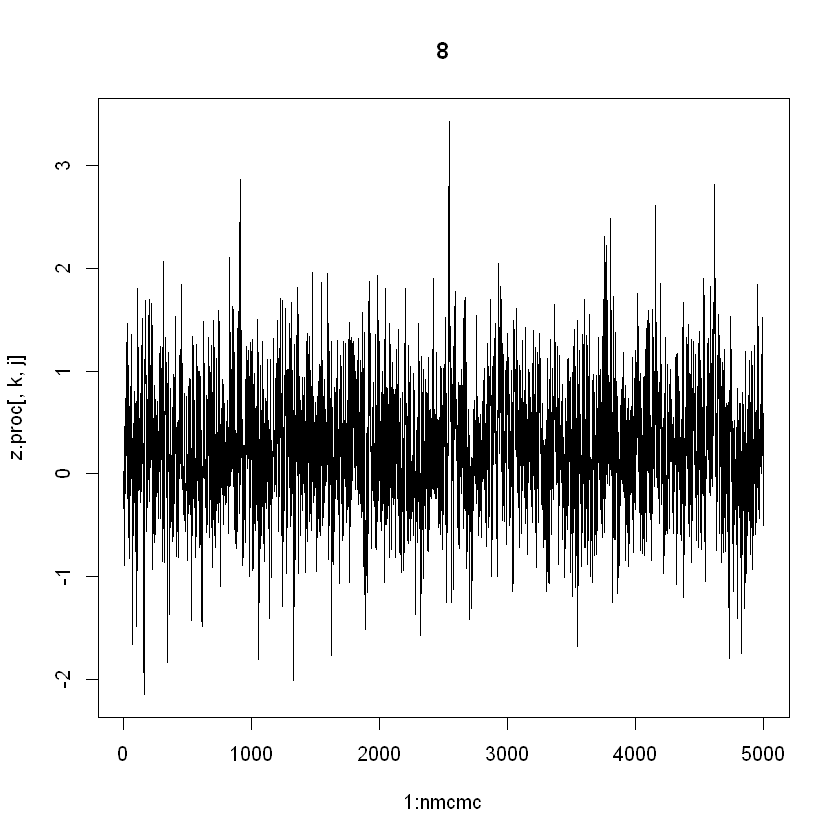

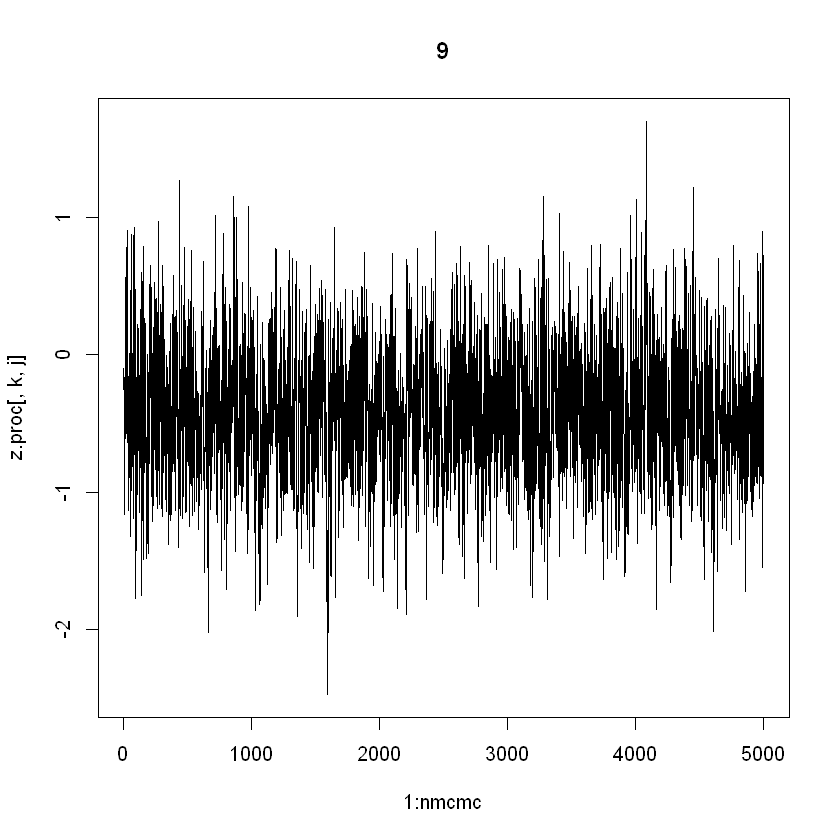

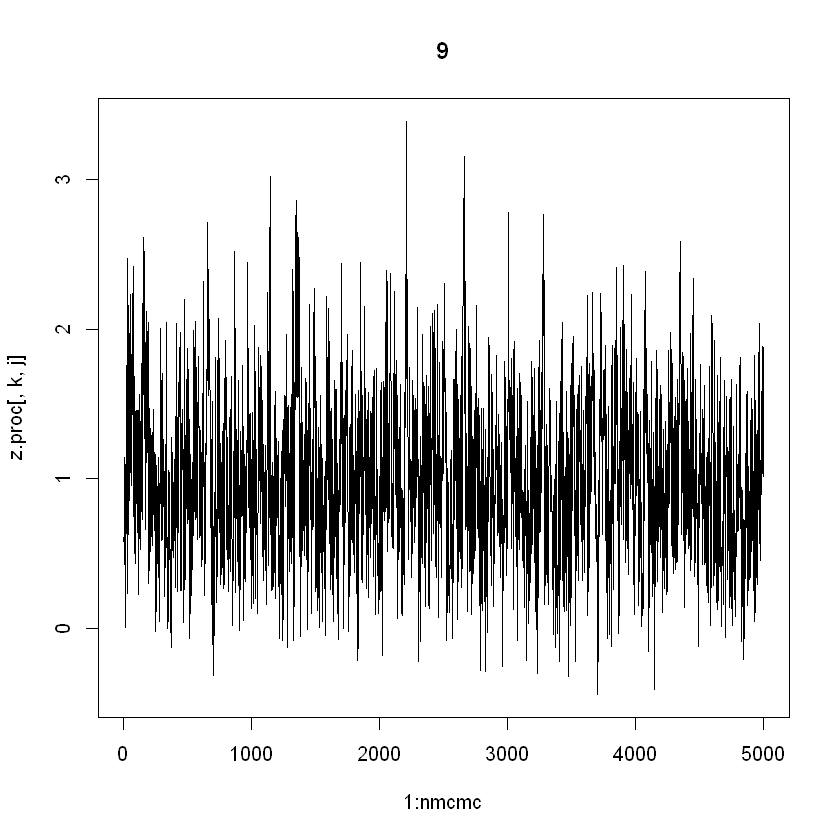

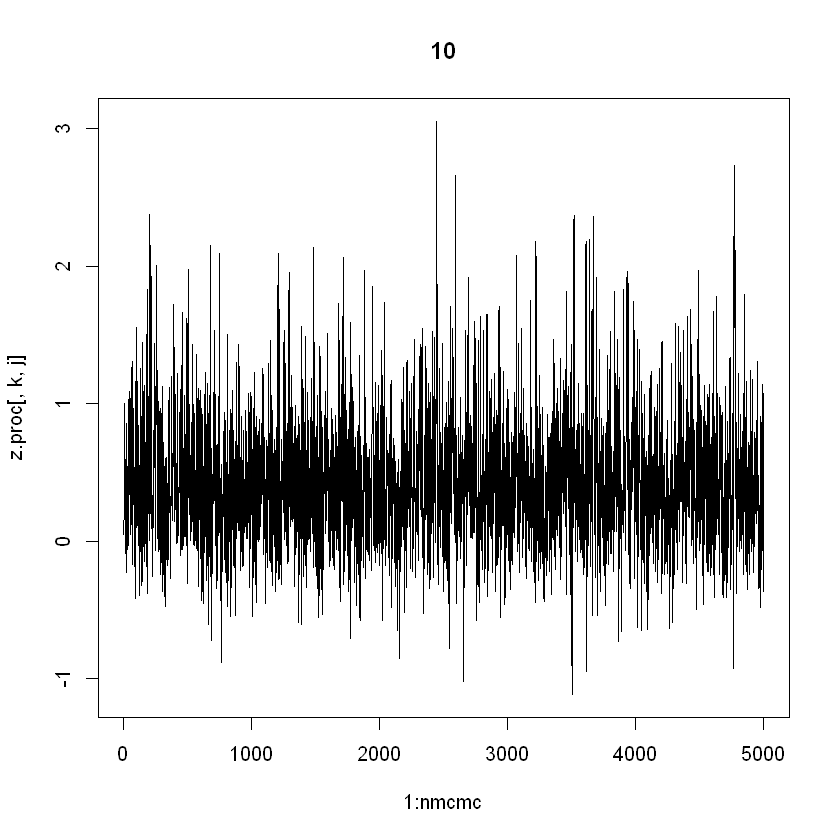

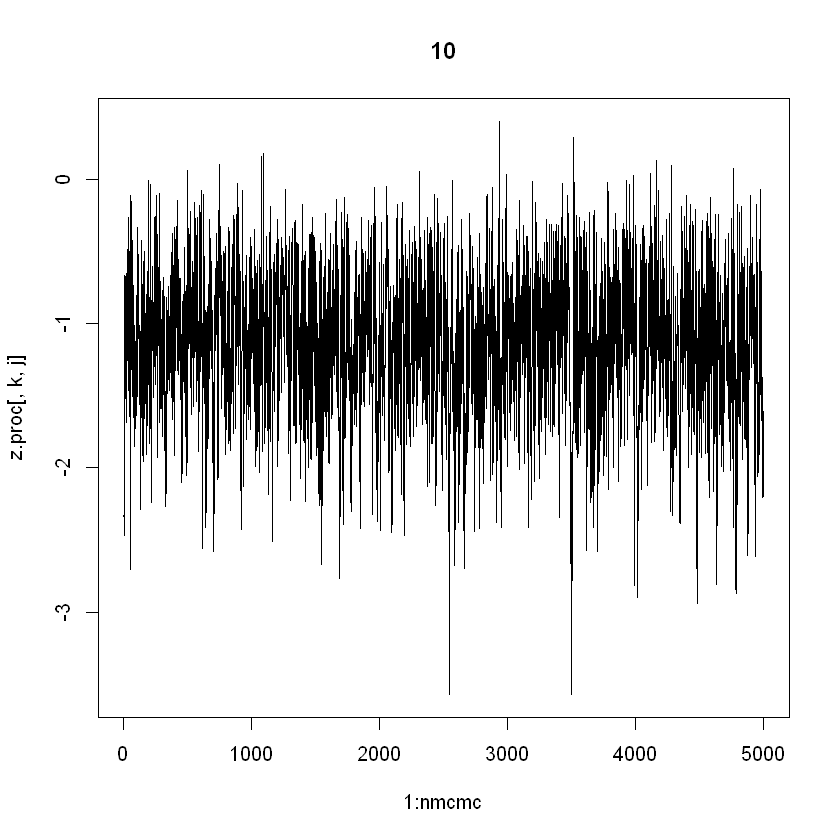

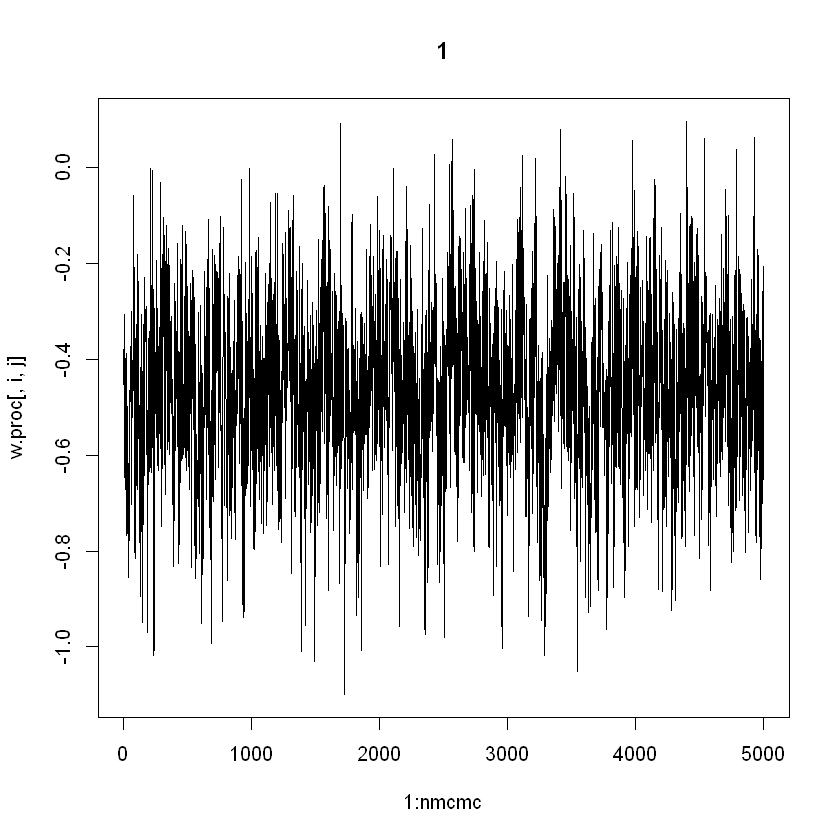

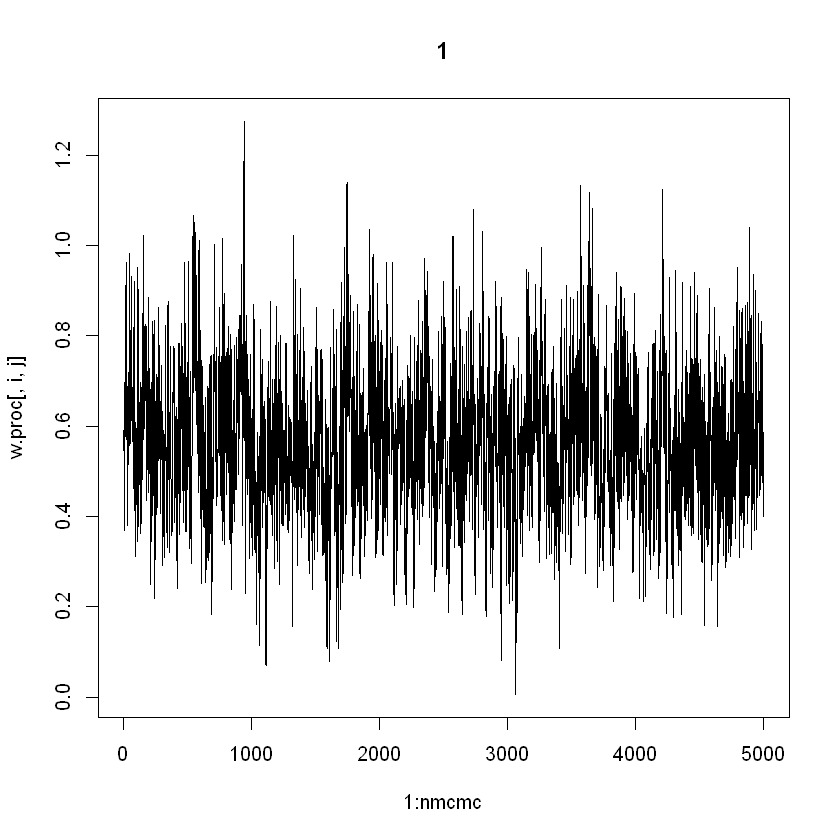

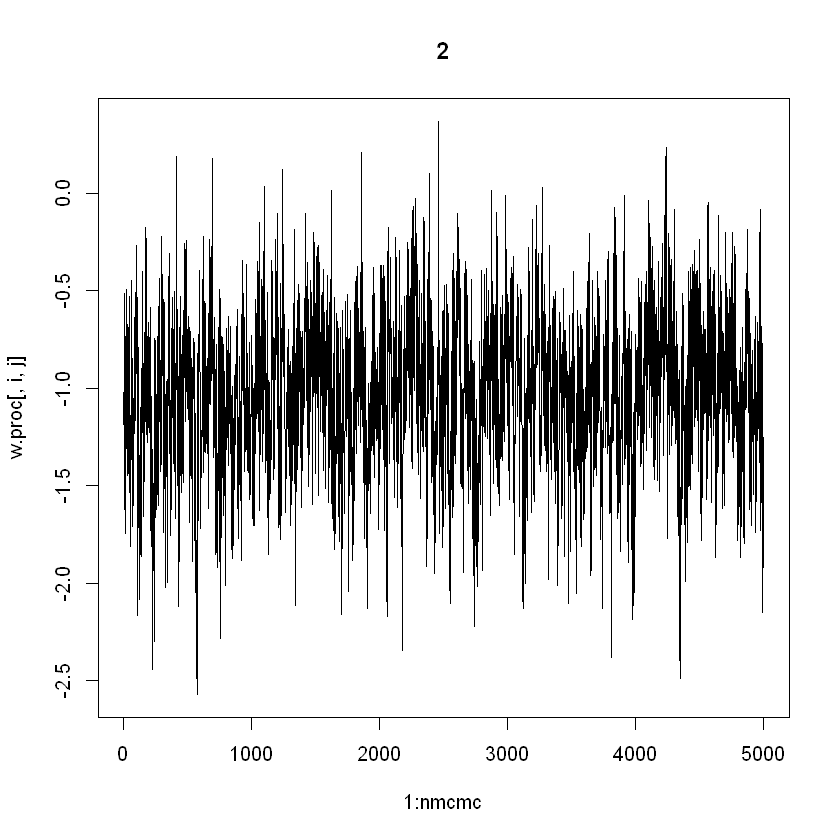

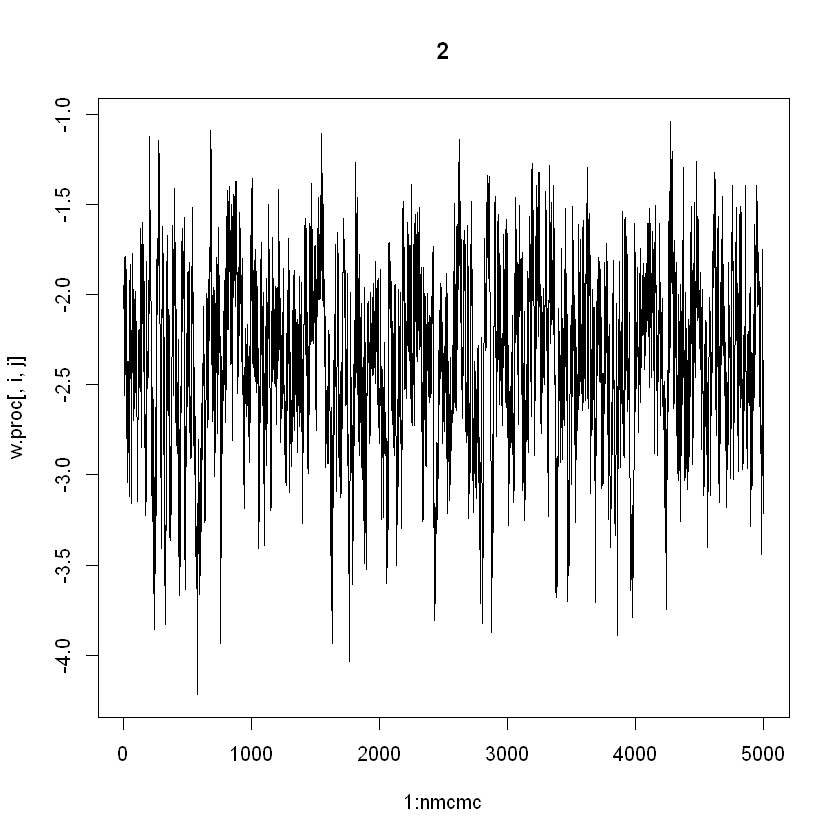

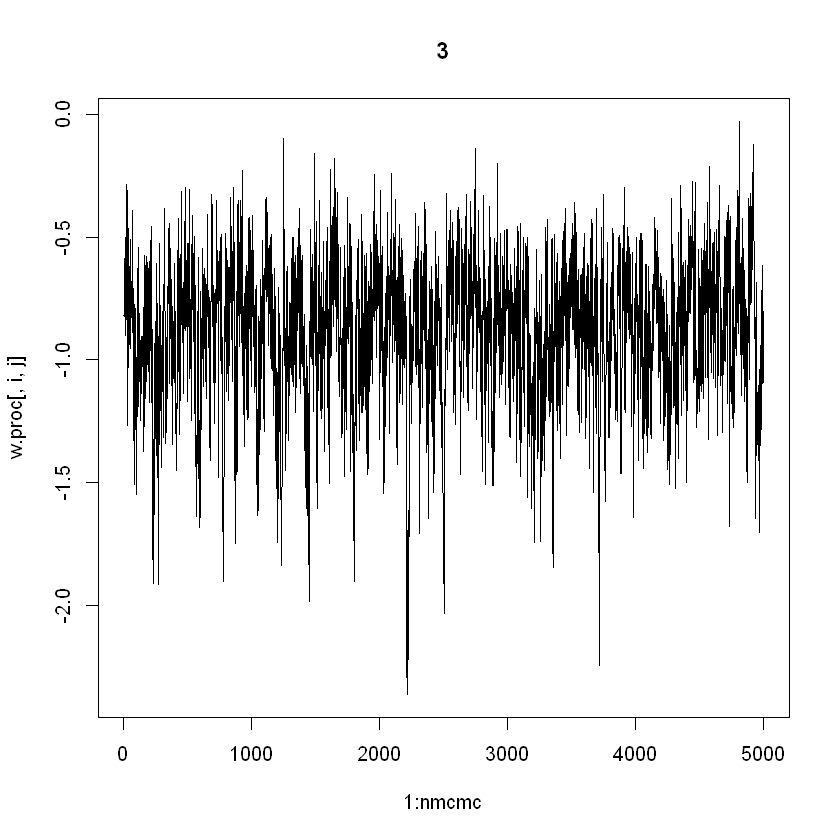

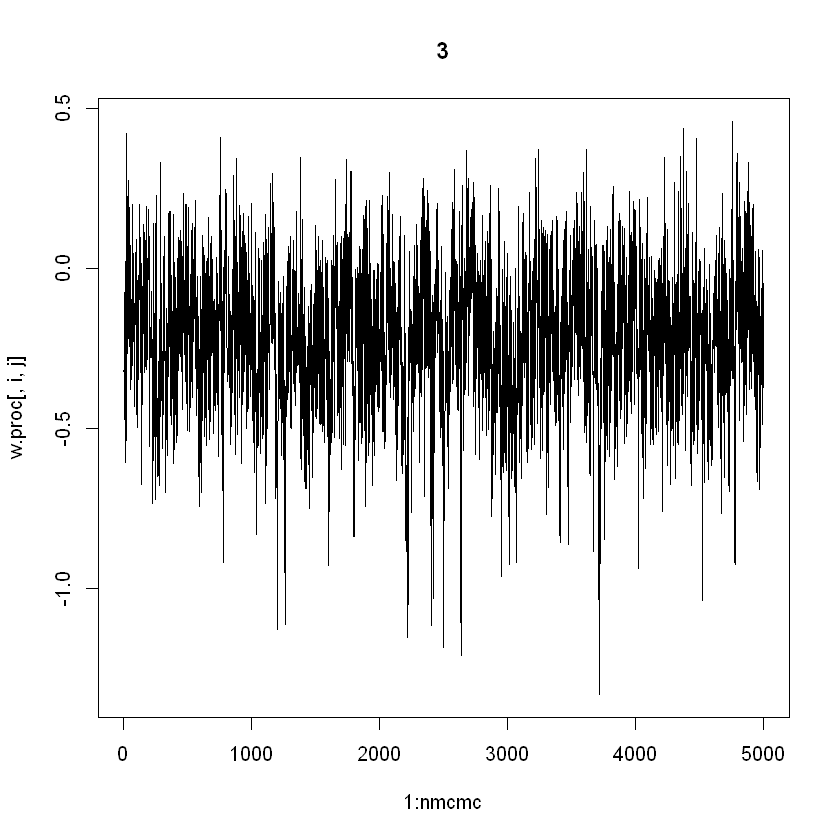

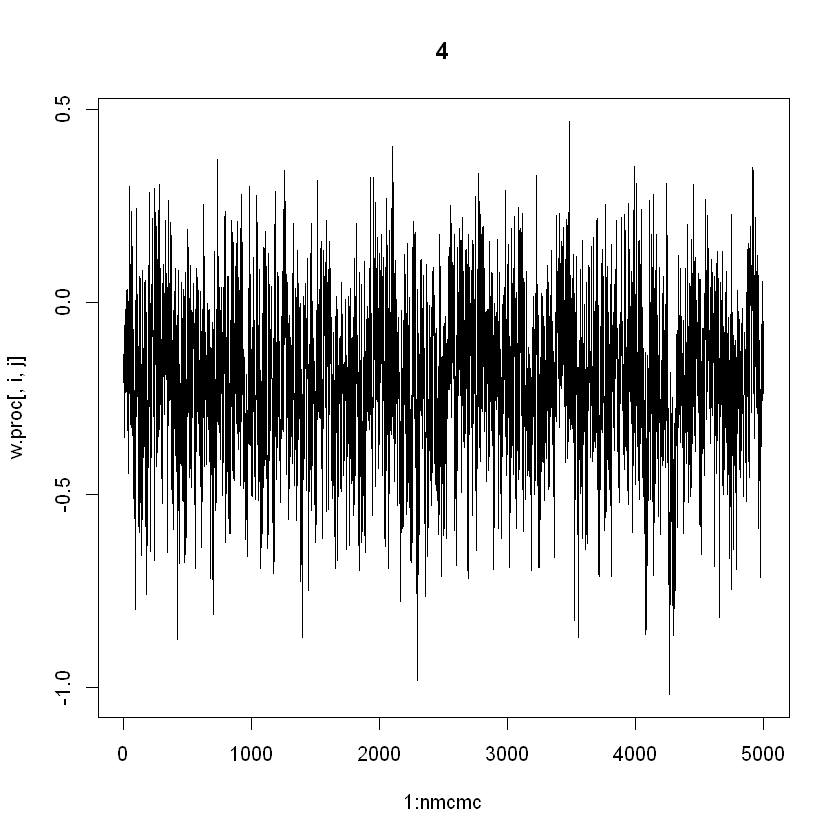

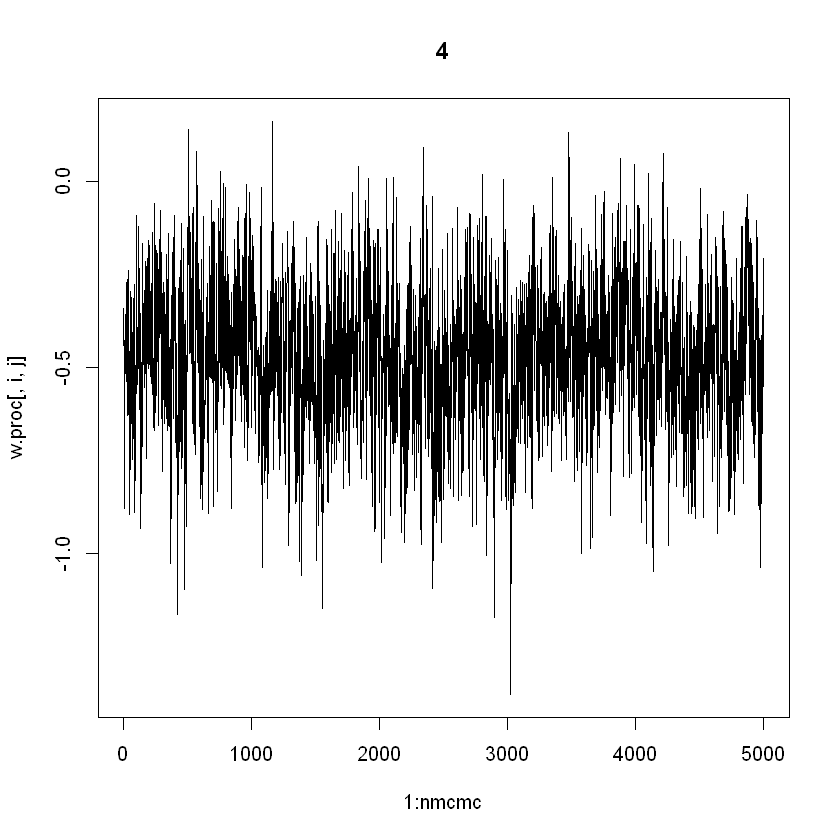

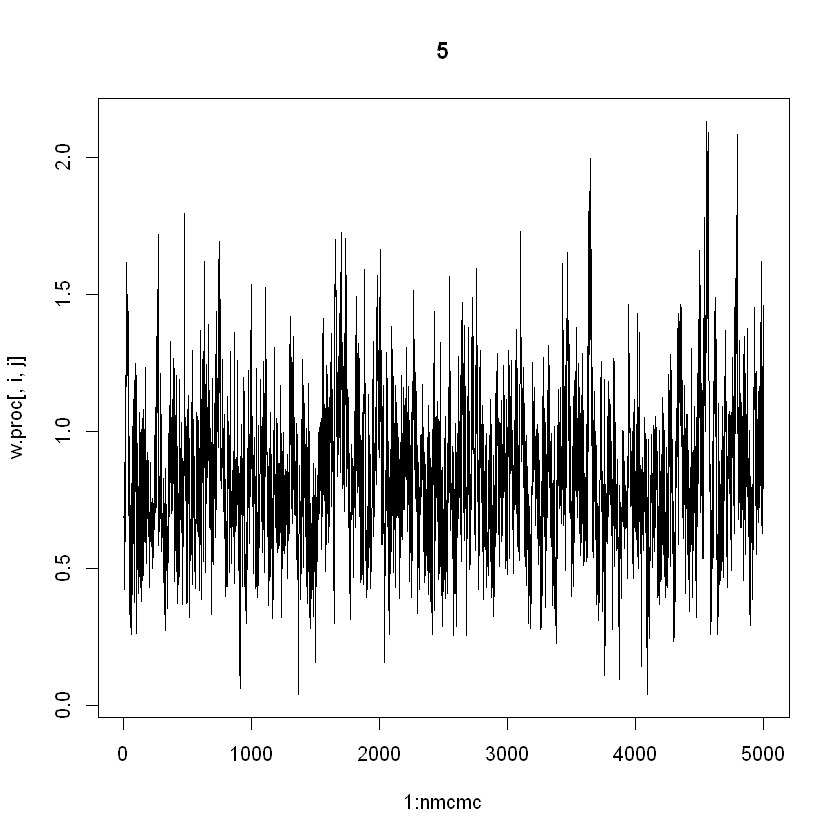

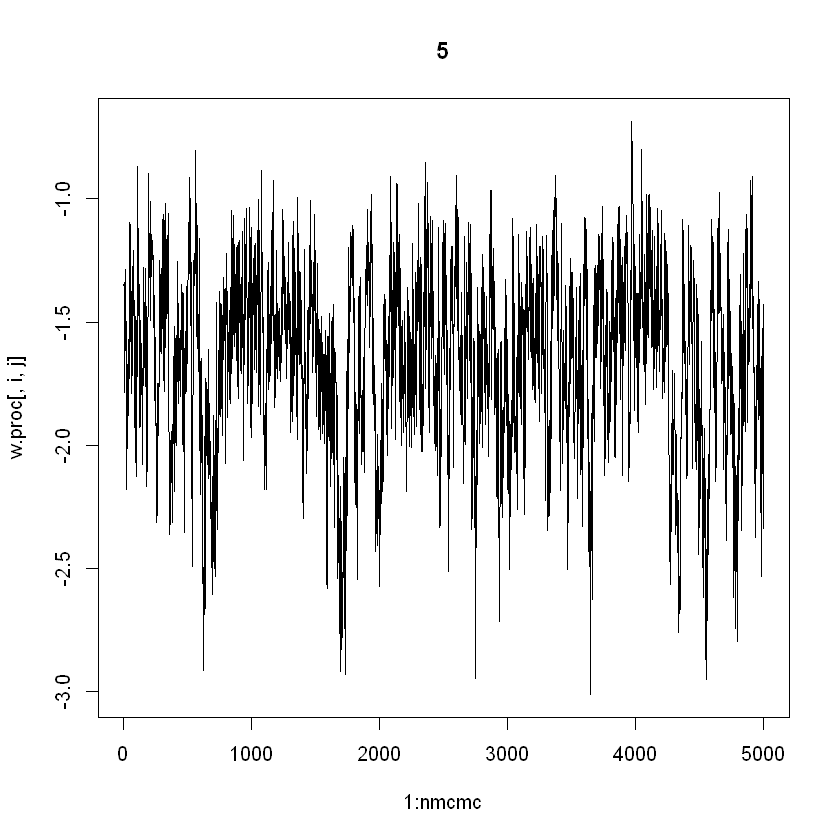

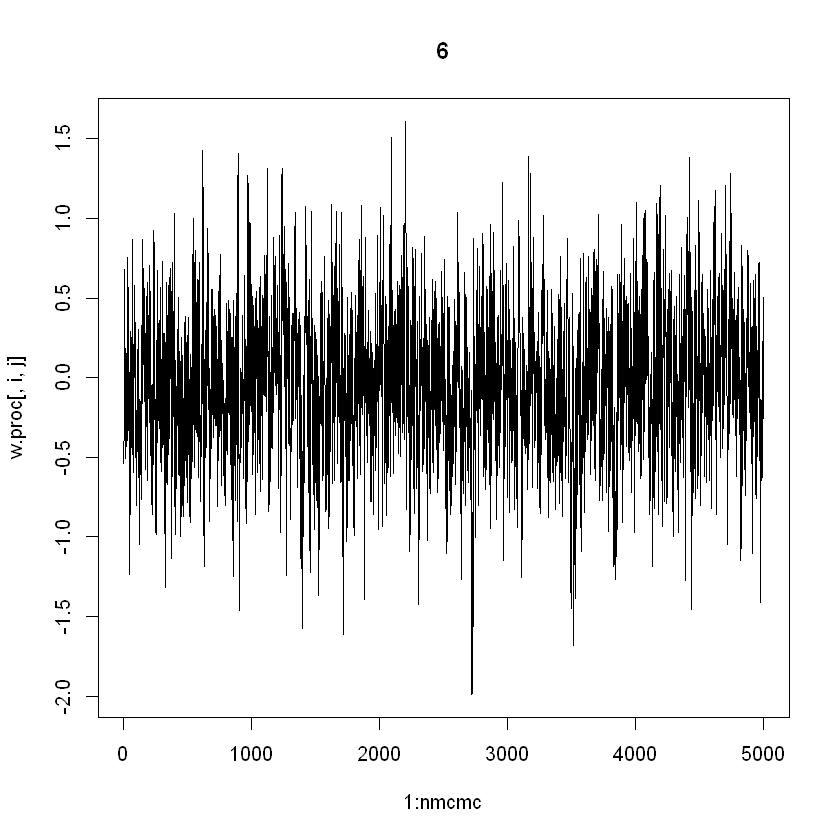

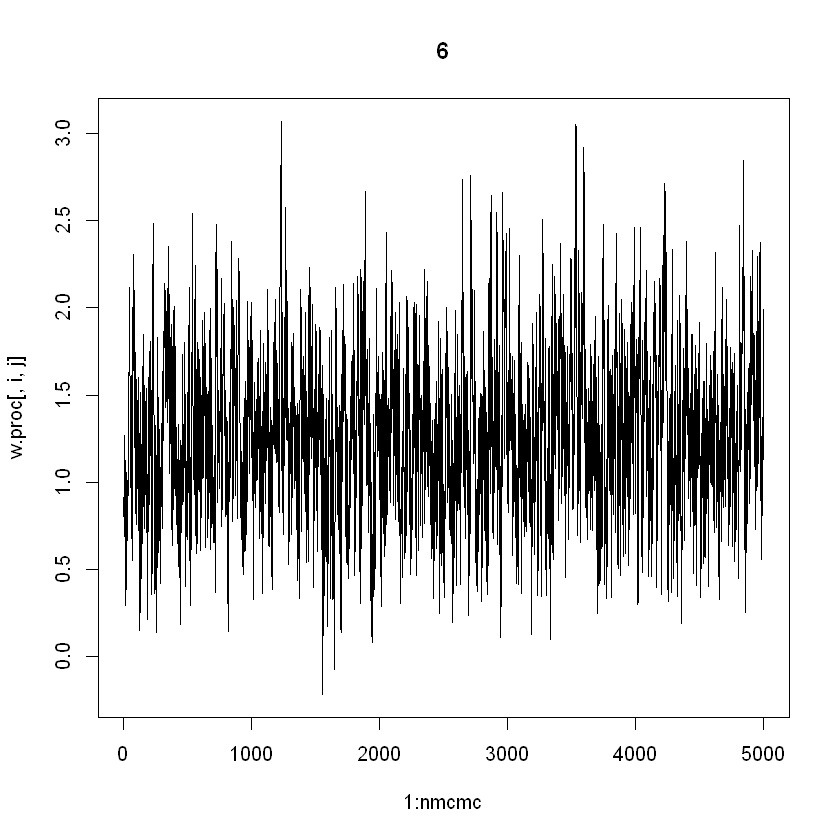

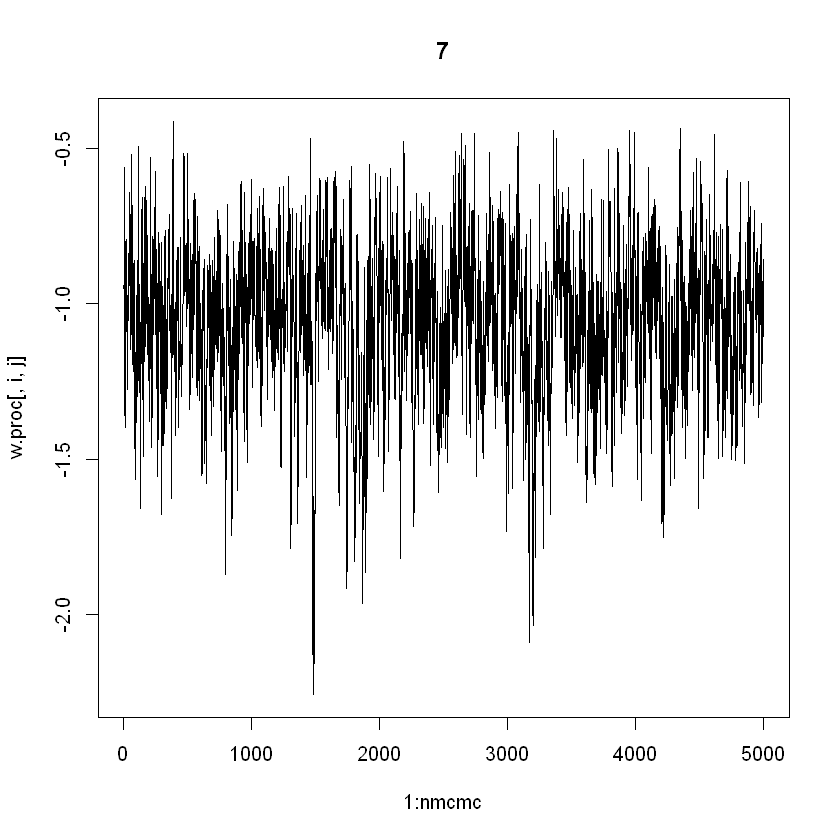

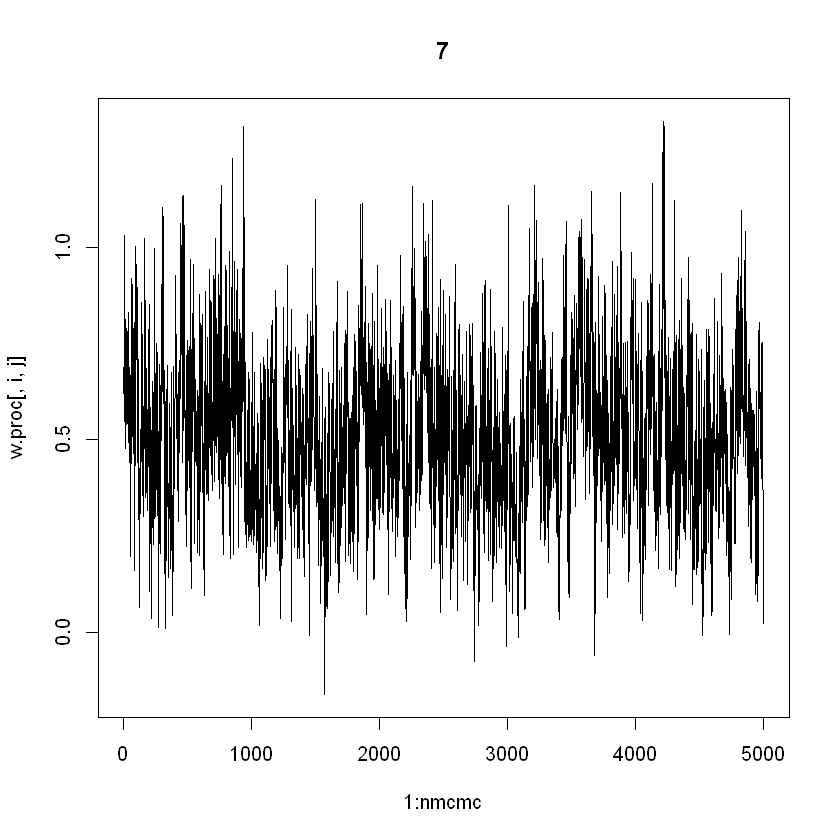

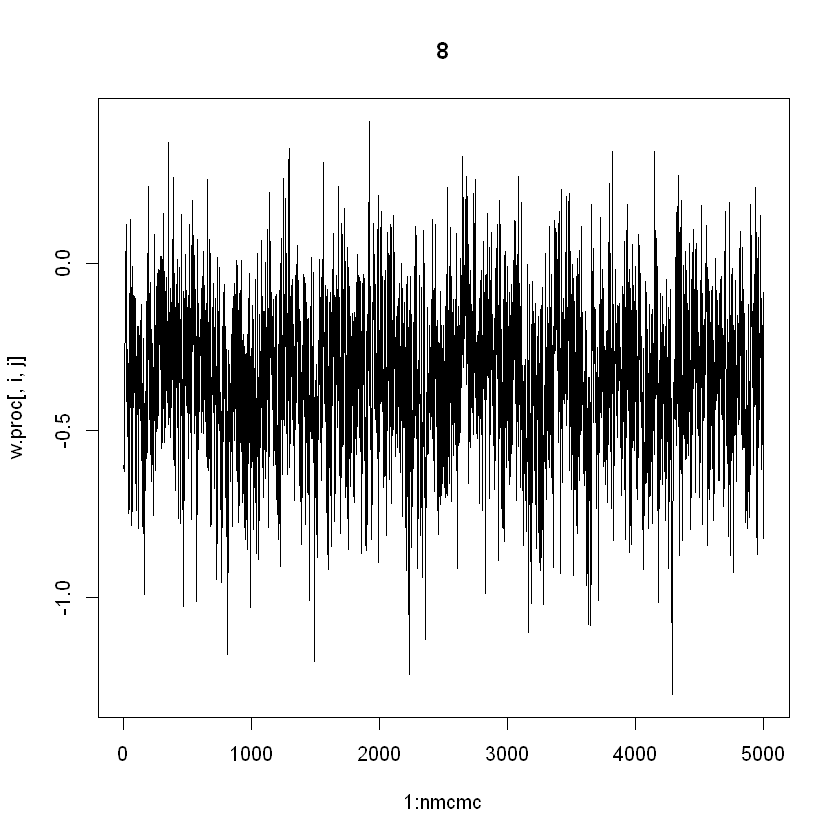

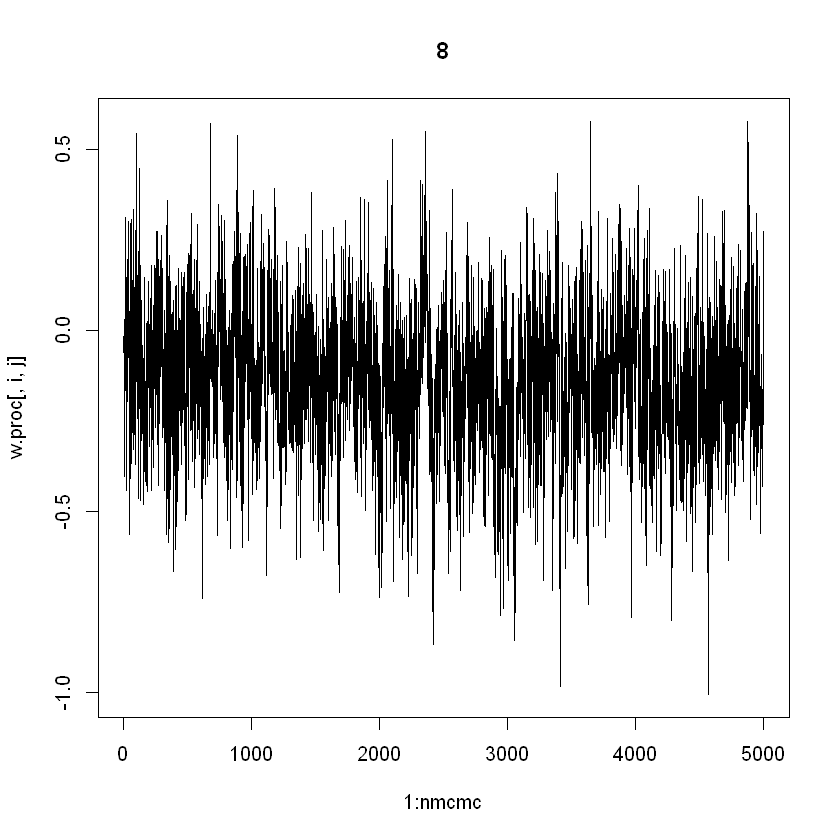

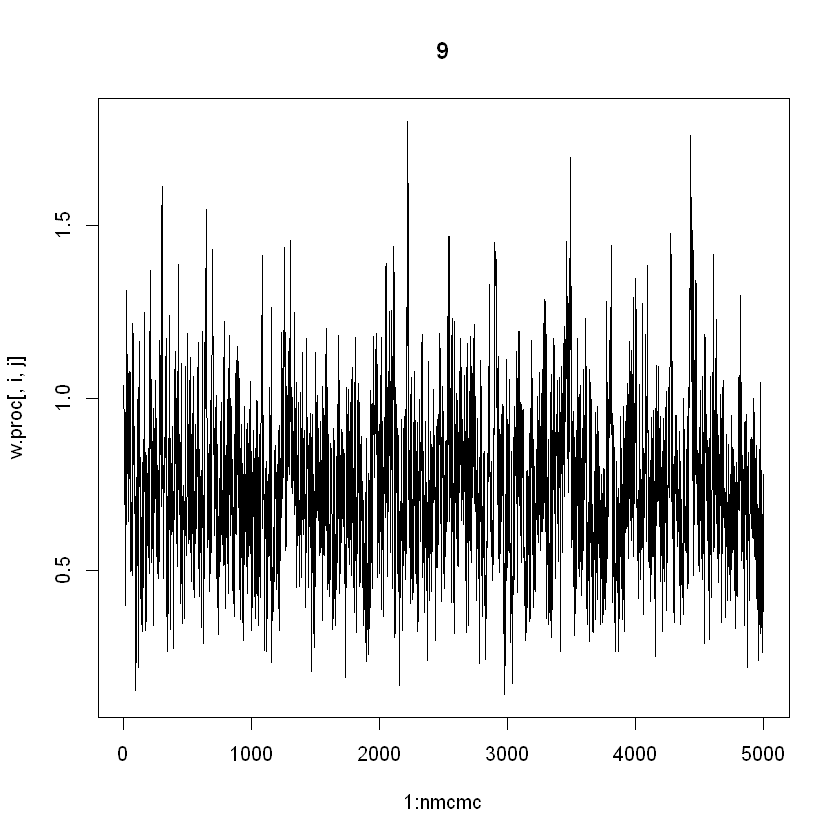

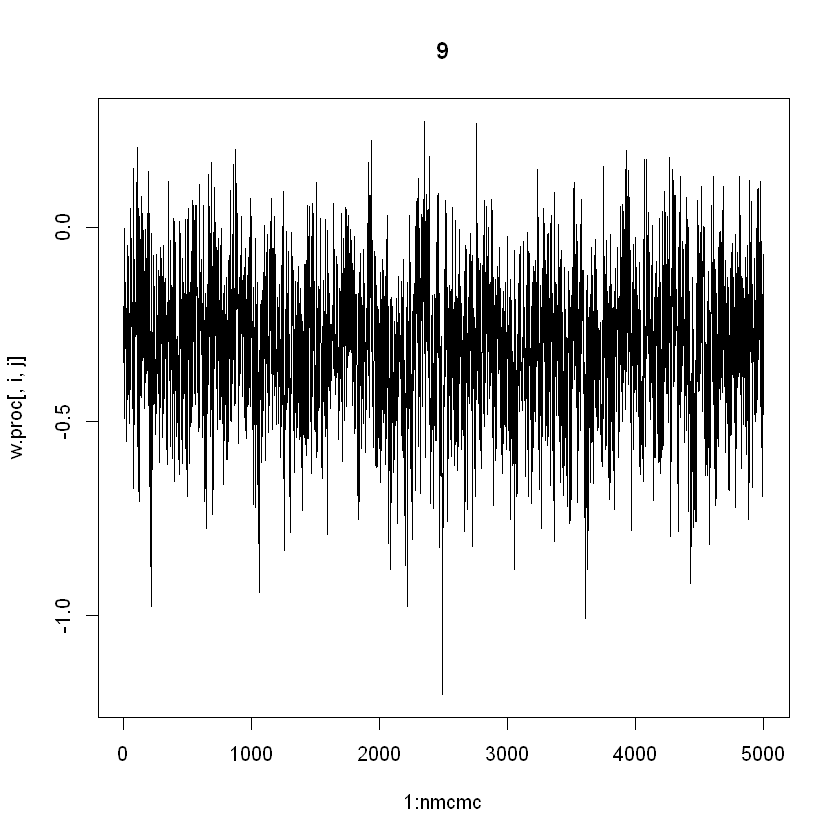

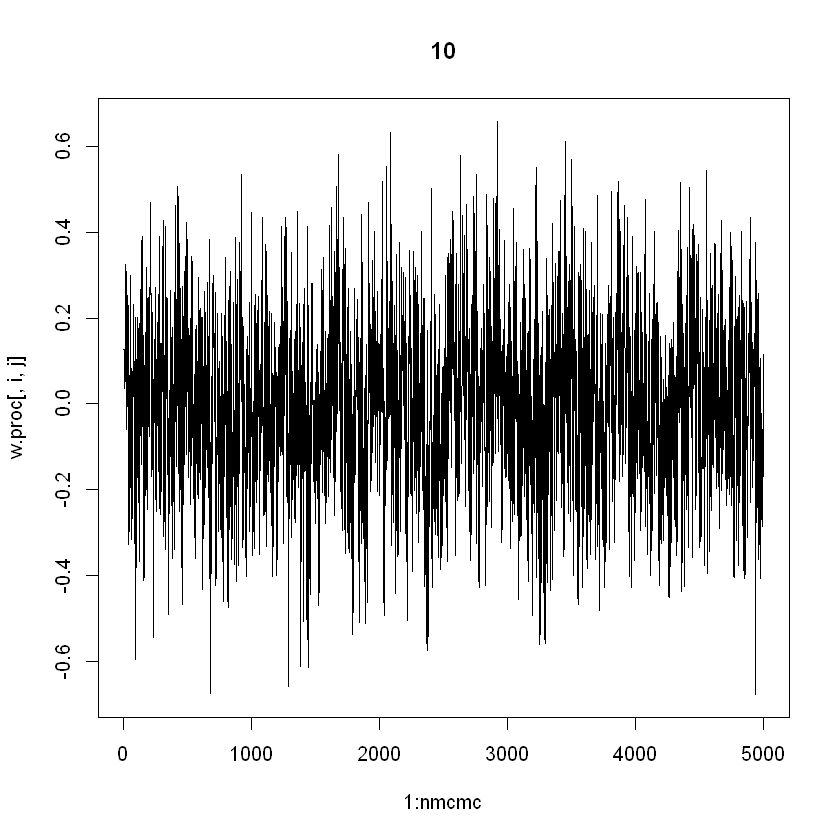

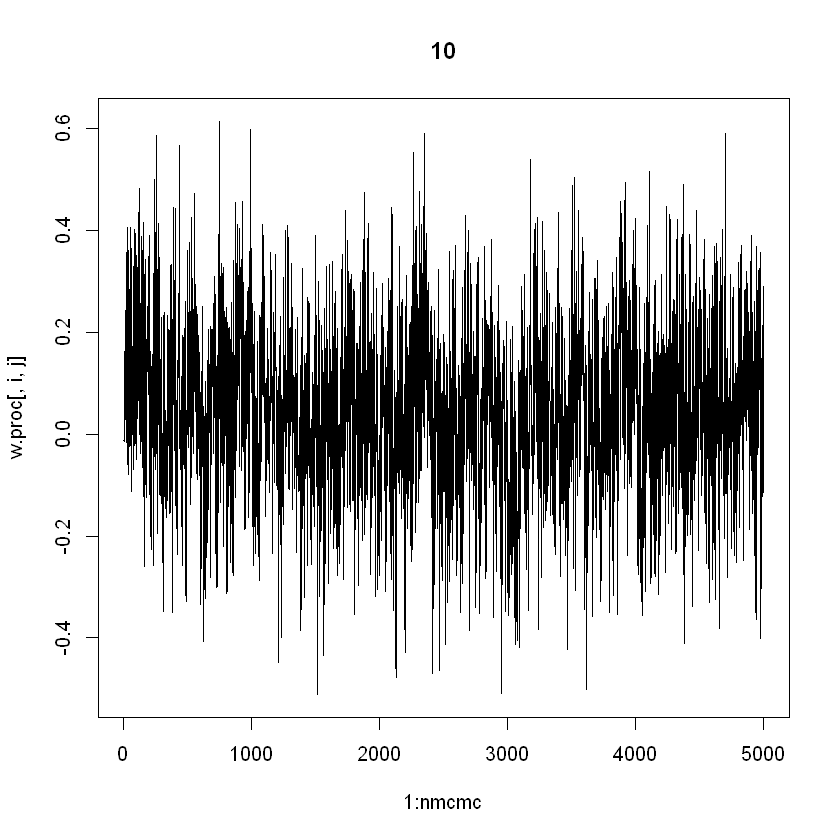

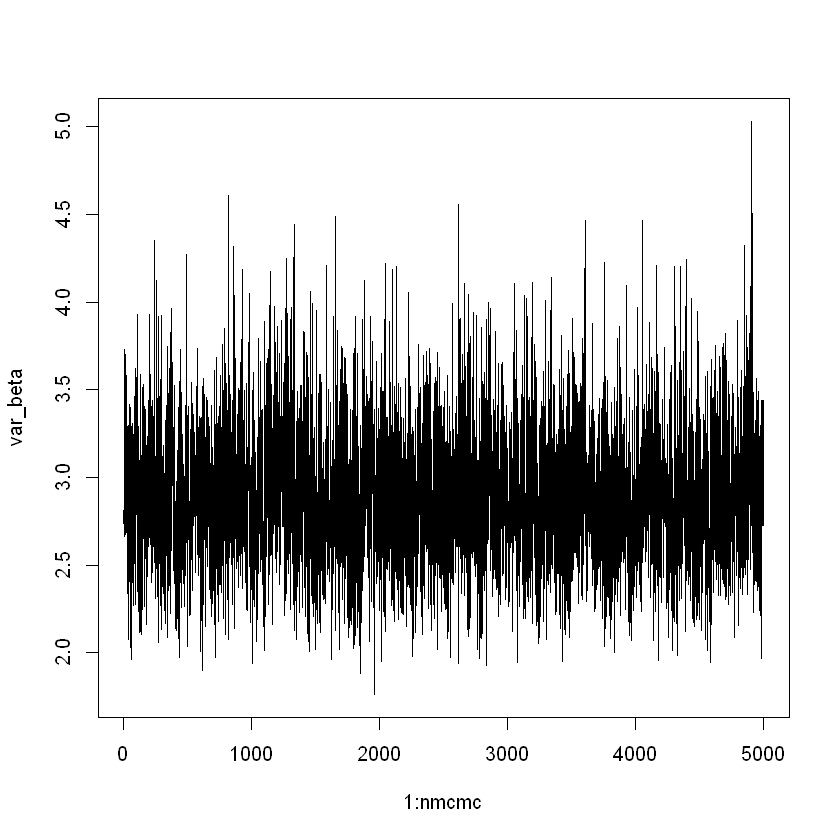

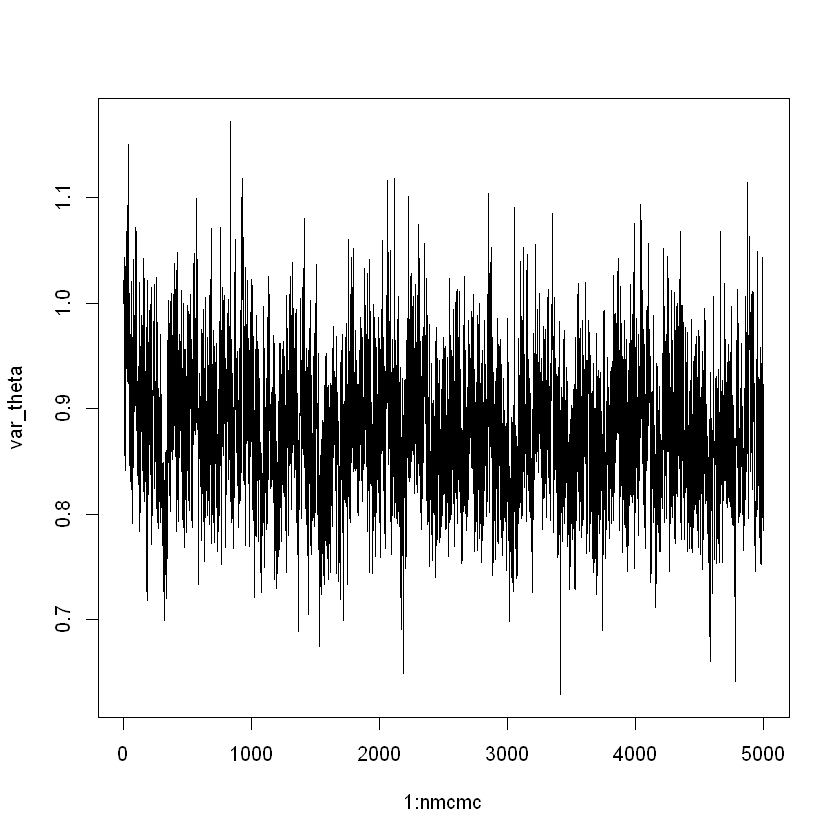

In [5]:
# draw trace plots
#("trace/beta.#")
for(i in 1:min(10,nitem)) plot(1:nmcmc,beta[,i],type="l",main=i)
#.off()
#("trace/theta.#")
for(k in 1:min(10,nsample)) plot(1:nmcmc,theta[,k],type="l",main=k)
#.off()
#("trace/z.#")
for(k in 1:min(10,nsample)) 
  for(j in 1:ndim) plot(1:nmcmc,z.proc[,k,j],type="l",main=k)
#.off()
#("trace/w.#")
for(i in 1:min(10,nitem))
  for(j in 1:ndim) plot(1:nmcmc,w.proc[,i,j],type="l",main=i)
#.off()
#("trace/var_beta.#")
plot(1:nmcmc,var_beta,type="l")
#.off()
#("trace/var_theta.#")
plot(1:nmcmc,var_theta,type="l")
#.off()

In [6]:
# item intercept parameter estimates
beta.est = apply(beta,2,mean)
beta.mcmc = mcmc(beta)
beta.result = matrix(NA,nitem,3)
beta.result[,1] = beta.est
beta.result[,2:3] = HPDinterval(beta.mcmc,prob=0.95)
colnames(beta.result) = c("estimate","lower","upper")
xtable(beta.result,digits=4)

estimate,lower,upper
1.15123143,0.9131360,1.37365825
-0.42579483,-1.2704743,0.49194476
3.18773642,2.7983881,3.65775018
2.09143933,1.8328248,2.33645532
1.40693255,0.8366201,2.11112792
5.56085280,4.8660711,6.37520768
1.13199463,0.7901467,1.49429394
3.29631861,3.0082124,3.58593629
2.13100707,1.8396432,2.45782509
2.21601921,2.0121436,2.41729305


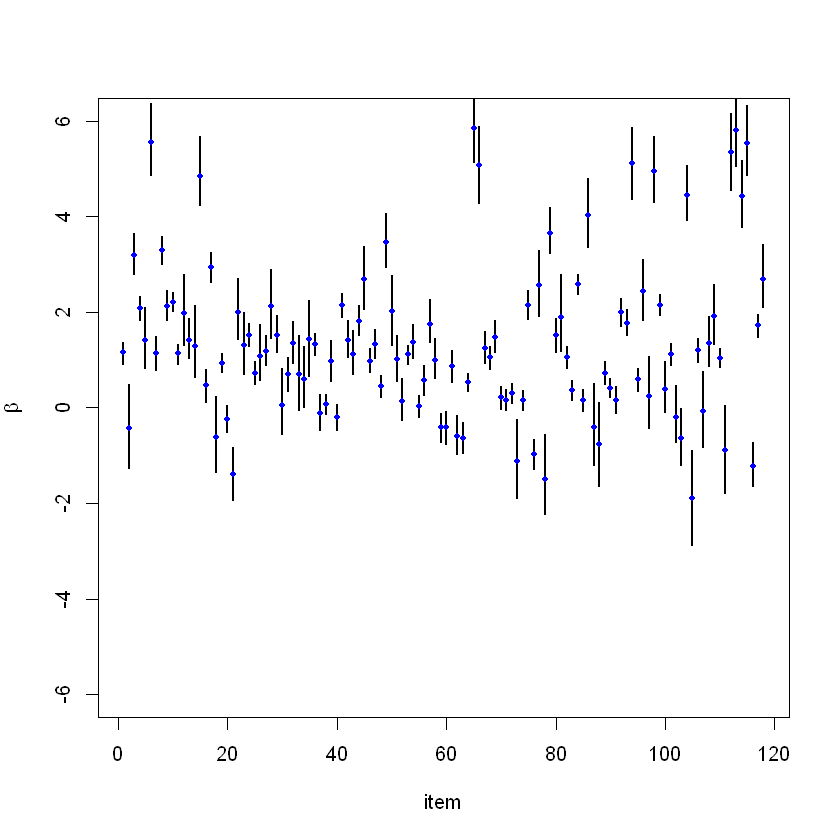

In [7]:
# draw plots for item intercept paramter estimates
x.axis = c(1:nitem)
y.axis = x.axis

#pdf("plot/beta.#pdf")
plot(x.axis,y.axis,ylim=c(-6.0,6.0),xlab="item",ylab=expression(beta),type="n")
for(i in 1:nitem){
  lines(c(i,i),beta.result[i,2:3],lwd=2)
  points(i,beta.result[i,1],pch=20,col=4)
}
#dev.off()


address
    5    12    14    15    16    17    18    19    21    22    23    24    25 
    1     1     2     1     1     3     6     3     3     6     4     2     8 
   26    27    28    29    30    31    32    33    34    35    36    37    38 
    8     5     8    15    12     7     8     4    18    12    11     9     7 
   39    40    41    42    43    44    45    46    47    48    49    50    51 
   10    10     5     7    10    10    11     9    13    16    10    11     9 
   52    53    54    55    56    57    58    59    60    61    62    63    64 
   14    17     8    15    13    10    11    13    16    14     9     8     6 
   65    66    67    68    69    70    71    72    73    74    75    76    77 
   11     8     3     9    13    10     1     9     6     7     5     8     4 
   78    79    80    81    82    83    84    85    86    87    89    90    91 
    7     7     4     3     3     2     5     3     5     3     1     1     1 
   94    95    96    97    99   105  1019  1

Warning message in min(temp):
"no non-missing arguments to min; returning Inf"Warning message in max(temp):
"no non-missing arguments to max; returning -Inf"Warning message in min(temp):
"no non-missing arguments to min; returning Inf"Warning message in max(temp):
"no non-missing arguments to max; returning -Inf"Warning message in min(temp):
"no non-missing arguments to min; returning Inf"Warning message in max(temp):
"no non-missing arguments to max; returning -Inf"Warning message in min(temp):
"no non-missing arguments to min; returning Inf"Warning message in max(temp):
"no non-missing arguments to max; returning -Inf"Warning message in min(temp):
"no non-missing arguments to min; returning Inf"Warning message in max(temp):
"no non-missing arguments to max; returning -Inf"Warning message in min(temp):
"no non-missing arguments to min; returning Inf"Warning message in max(temp):
"no non-missing arguments to max; returning -Inf"Warning message in min(temp):
"no non-missing arguments to

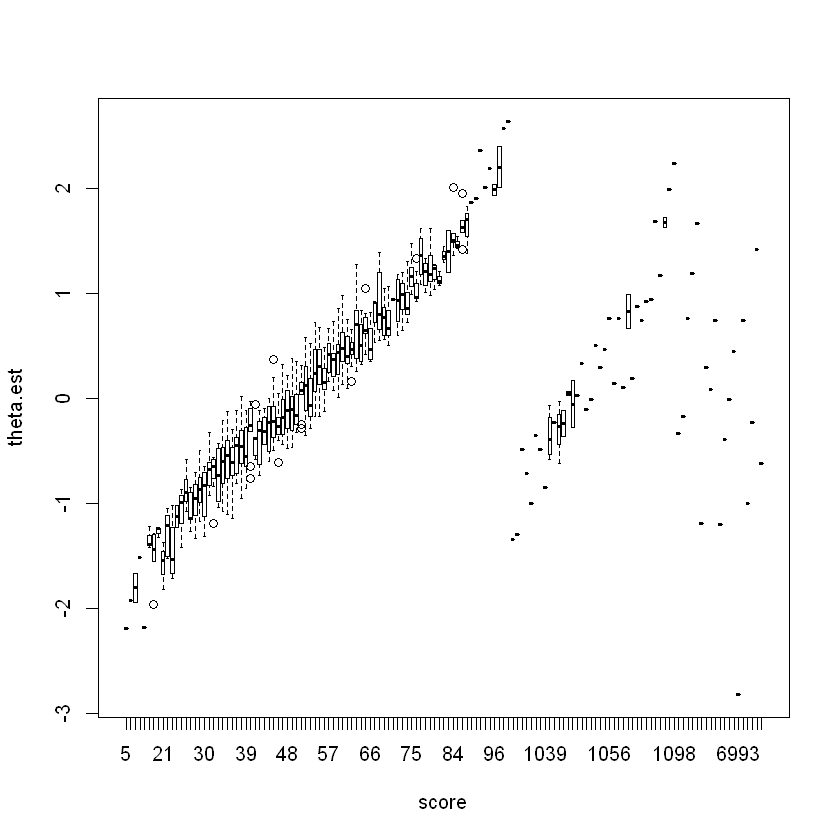

In [8]:
# summarize person intercept parameters by total scores
item = matrix(scan("data/item.txt"),ncol=nitem,byrow=TRUE)
address = apply(item,1,sum)
table(address)
theta.result = matrix(NA,nitem+1,5)
theta.est = apply(theta,2,mean)
for(i in 0:nitem){
  temp = theta.est[address==i]
  theta.result[(i+1),] = c(min(temp),quantile(temp,c(0.25,0.5,0.75)),max(temp))
}

# draw boxplots for person intercept paramter by total scores
score = as.factor(address)
theta.frame = data.frame(theta.est,score)
boxplot(theta.est~score, data=theta.frame)
#pdf("plot/theta.#pdf")
boxplot(theta.est~score, data=theta.frame)
#dev.off()

In [9]:
tic()
# parameter estimates for variance (item intercept, person intercept)
mcmc_var_beta = mcmc(var_beta)
mcmc_var_theta = mcmc(var_theta)
round(c(mean(var_beta),HPDinterval(mcmc_var_beta,0.95)),4)
round(c(mean(var_theta),HPDinterval(mcmc_var_theta,0.95)),4)

# get point estimates of respondent and item latent spaces
w.est = matrix(NA,nitem,ndim)
z.est = matrix(NA,nsample,ndim)
for(i in 1:nitem){
  for(j in 1:ndim){
    w.est[i,j] = mean(w.proc[,i,j])
  }
}
for(k in 1:nsample){
  for(j in 1:ndim){
    z.est[k,j] = mean(z.proc[,k,j])
  }
}
toc()

[1] 2.8802 2.0669 3.6263

[1] 0.8796 0.7566 1.0151

0.31 sec elapsed


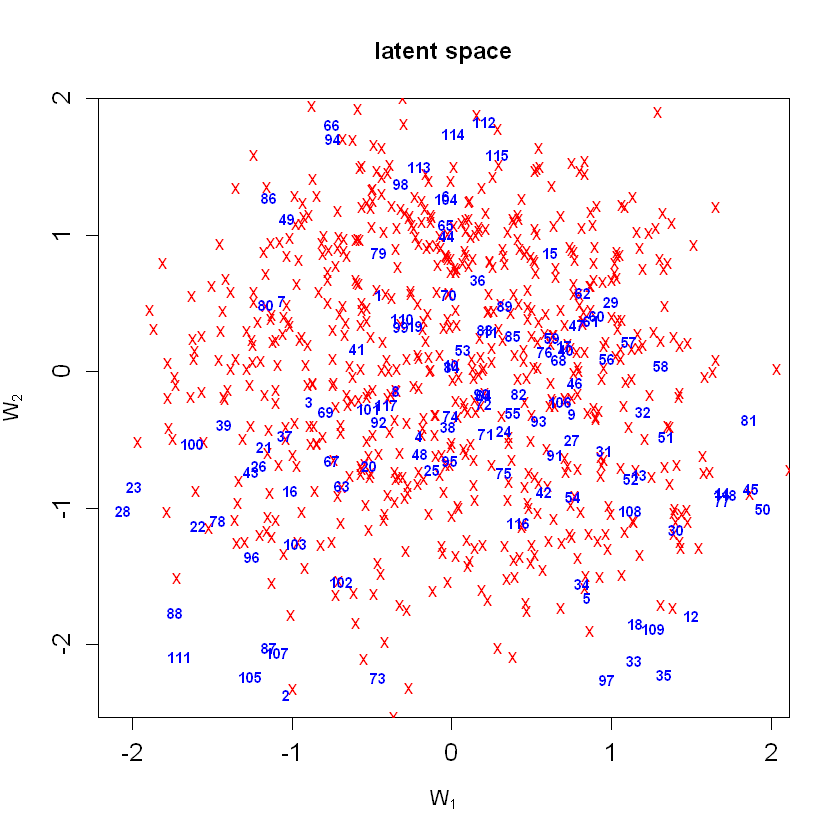

In [10]:
# # plot respondent latent spaces
# plot(z.est[,1],z.est[,2],pch=20,
#      xlab=expression(Z[1]),ylab=expression(Z[2]),
#      main="respondent latent space")

# # plot item latent spaces
# plot(w.est[,1],w.est[,2],cex.axis=1.25,pch="",
#      xlab=expression(W[1]),ylab=expression(W[2]),
#      main="item latent space")
# text(w.est[,1],w.est[,2],labels=1:nitem,cex=0.75,font=2)

# plot item and respondent latent spaces simultaneously
#pdf("plot/latent.#pdf")
plot(w.est[,1],w.est[,2],cex.axis=1.25,pch="",
     xlab=expression(W[1]),ylab=expression(W[2]),
     main="latent space")
points(z.est[,1],z.est[,2],pch="x",col=2)
text(w.est[,1],w.est[,2],labels=1:nitem,cex=0.75,font=2,col=4)
#dev.off()

In [11]:
length(beta.est)
length(theta.est)
dim(w.est)

[1] 118

[1] 662

[1] 118   2

In [12]:
write.csv(w.est,'./west_cbcl.csv',row.names = F,fileEncoding = 'UTF-8')
write.csv(beta.est,'./beta_cbcl.csv',row.names = F,fileEncoding = 'UTF-8')
write.csv(theta.est,'./theta_cbcl.csv',row.names = F,fileEncoding = 'UTF-8')

In [13]:
dim(impute)

[1] 5000  150

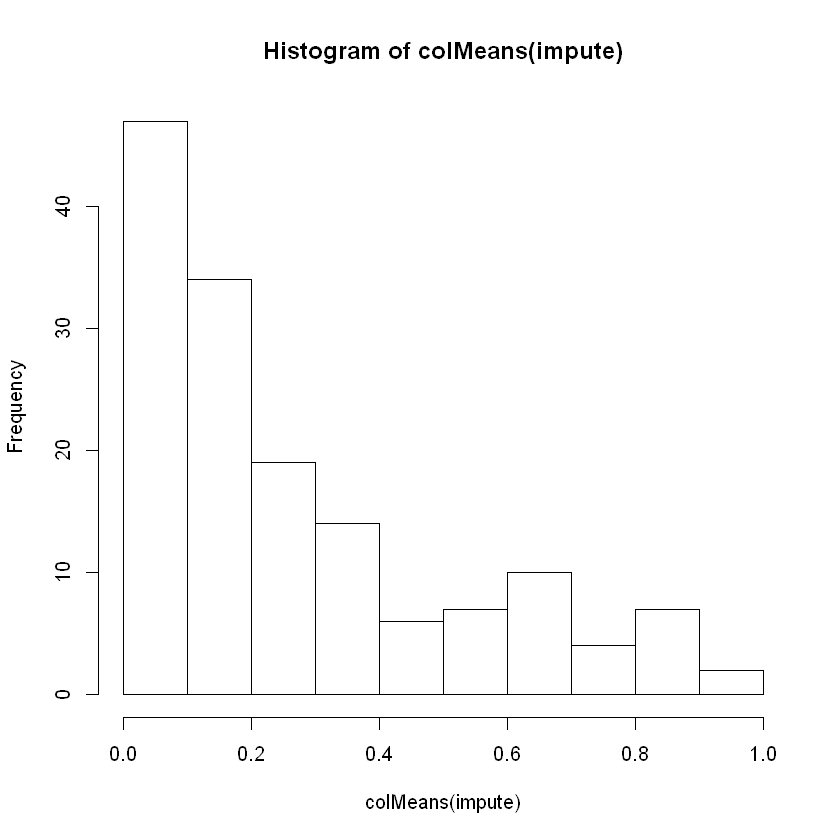

In [14]:
hist(colMeans(impute))